# DATA CLEANING

## CENTRAL LONDON DATA SET

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
from datetime import datetime

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')
  
# Read the provided CSV file/data set.            
london_central = pd.read_csv('Central London.csv') 

# View DataFrame.
london_central.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,NaN,NaN,NaN


In [2]:
# Any missing values?
london_central.isnull().sum()          

Survey wave (calendar quarter)     290203
Equivalent financial quarter       290203
Site ID                            290203
Location                           290203
Survey date                        300359
Weather                            302037
Time                               290203
Period                             290203
Direction                          290203
Start hour                         290203
Start minute                       290203
Number of private cycles           290267
Number of cycle hire bikes         290267
Total cycles                       290203
Unnamed: 14                       1048366
Unnamed: 15                       1048366
Unnamed: 16                       1048366
dtype: int64

In [3]:
# Explore the data.
london_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [4]:
# Drop last three columns as contain no values.
L_centr_fnl = london_central.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']).reset_index(drop=True)

# View DataFrame.
print(L_centr_fnl.shape)
L_centr_fnl.head()

(1048366, 14)


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0


In [5]:
L_centr_fnl.tail()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
1048361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop the rows where all elements are missing.
L_centr_fnl_0 = L_centr_fnl.dropna(how='all')

# View DataFrame.
print(L_centr_fnl_0.shape)
L_centr_fnl_0.head()

(758163, 14)


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0


In [7]:
# Check missing values.
L_centr_fnl_0.isnull().sum()

Survey wave (calendar quarter)        0
Equivalent financial quarter          0
Site ID                               0
Location                              0
Survey date                       10156
Weather                           11834
Time                                  0
Period                                0
Direction                             0
Start hour                            0
Start minute                          0
Number of private cycles             64
Number of cycle hire bikes           64
Total cycles                          0
dtype: int64

### Cleaning Weather Column

The original London Central data was edited in Excel. Looking at the below code can see there is 283 different classifications for weather. Looking into the Excel file can see that there are a lot of Weather classifications some which are the same just spelt differently and some which are spelt incorrectly. This needs cleaning to categorise the data better and improve processes. 

In [8]:
# Check for unique values.
L_centr_fnl_0['Weather'].nunique()

283

In [9]:
# Change relevant values to Cloudy
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cloudy/dry', 'Cloudy And Warm', 
                                                               'Dry/cloudy', 'Overcast', 'Overcast And Dull',
                                                               'Partly Cloudy'], 'Cloudy')

In [10]:
# Check that values have been changed
L_centr_fnl_0[L_centr_fnl_0['Weather'] == 'Cloudy And Warm']

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles


In [11]:
# Change relevant values to Cold
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cold Dry', 'Coldish', 'Cold/dry', 'Dry/cold',
                                                             'Dry & Cold','Fine Cold', 'Fine V Cold',
                                                              'Now Starts To Get Chilly', 'Very Cold/dry'], 'Cold')

In [12]:
# Change relevant values to Damp
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Almost Dry'], 'Damp')

In [13]:
# Change relevant values to Dark
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Dark Sunny', 'Dry Dark', 'Dark Dry'],
                                                             'Dark')

In [14]:
# Change relevant values to Dry
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['2 Snowflakes Otherwise Dry',
                                                              'A Bit Chilly At First', 'dry', 'Ddry',
                                                              'Drty', 'Dry & Mild', 'Dry 3/4 Dry',
                                                              'Dry And Fine', 'Dry And Overcast',
                                                              'Dry But Rain Threatening', 'Dry Fri',
                                                              'Dry Mon', 'Dry Thu', 'Dry Wed', 'Dry Y',
                                                              'Dry/good', 'Dry/sunny/cold', 'Drying Up',
                                                              'Dryish', 'Dull', 'Dy', 'Fair', 'Fine',
                                                              'Fine + Dry Chilly At First', 'Fine And Dry',
                                                              'Good/dry', 'Kdry', 'Mild', 'Rain Looking Likely',
                                                              'Rain Stopped', 'Rain Stopped-dry', 
                                                             'Dry (+brief Speels Of Drizzle'], 'Dry')

In [15]:
# Change relevant values Dry & Rain
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cold & Dry Early Rain Later',
                                                              'Dry - Rain', 'Rain Dry', 'Rain/dry'], 'Dry & Rain')

In [16]:
# Change relevant values to Dry & Wet
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Dry - Wet', 'Dry + Wet',
                                                              'Dry + Wet', 'Dry A.m Wet P.m',
                                                              'Dry But Wet Road', 'Dry But Wet Roads',
                                                              'Dry Road Still Wet', 'Dry Road Wet With Leaves',
                                                              'Dry Wet Road', 'Dry-Wet', 'Dry-wet', 'Dry/wet Road Surface',
                                                              'Wet - Dry', 'Wet + Dry', 'Wet First Then Dry', 
                                                              'Wet-dry', 'Wet/ Dry', 'Wet/dry', 'Wetr First Then Dry',
                                                              'Dry/wet'], 'Dry & Wet')

In [17]:
# Change relevant value to Frost / Fog
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Dry (frost & Fog)', 'Foggy',
                                                              'Foogy/v Cold', 'Foggy/v Cold'], 'Frost / Fog')

In [18]:
# Change relevant value to Hail / Sleet
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cloudy/hail', 'Hail', 'Hail',
                                                             'Hail Shower', 'Sleet', 'Wet Light Hailstone'], 
                                                             'Hail / Sleet')

In [19]:
# Change relevant values to Heavy Rain
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Deluge', 'Down Pour', 'H Rain', 'Rain-heavy', 
                                                             'Very Heavy Rain'], 'Heavy Rain')

In [20]:
# Change relevant values to Hot
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Dry/hot', 'Hot + Humid', 'Hot And Humid', 
                                                             'Hot And Sunny', 'Hot/dry', 'Very Hot Dry'], 'Hot')

In [21]:
# Change relevant values to Light Rain
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['(drizzle)', 'A Few Drops Of Rain',
                                                              'A Few Rain Showers', 'Cloudy/drizzle',
                                                              'Cold/showery', 'Damp & Drizzly', 'Drizzle',
                                                              'Drizzle Damp', 'Drizzle/rain', 'Drizzle/showers',
                                                              'Drizzle/wet', 'Drizzling', 'Drizzly', 'Drizzly Rain',
                                                              'Dry (+brief Speels Of Drizzle)', 'Dry With Intermitent Rain', 
                                                              'Dry/drizzle', 'Dry/drizzly', 'Fine Drizzle',
                                                              'Intermitent Light Rain', 'Intermitent Light Showers',
                                                              'Light Drizzle', 'Light Shower', 'Light Showers',
                                                              'Light Showers Inc Some Hail', 'Light Shrs',
                                                              'Lt Rain', 'Shower', 'Shower/wet', 'Showers', 'Showers Mix',
                                                              'Showery', 'Slight Drizzle', 'Slight Drizzle Till End', 'Some Showers',
                                                              'Spitting', 'Spitting ', 'V Cold Showers', 'V Light Drizzle', 'V Light Rain',
                                                              'V Light Showers', 'V Light Shrs', 'V Lt Rain', 'V. Light Rain',
                                                              'V.light Drizzle', 'V.light Rain', 'Very Light Rain', 'V.wet', 
                                                              'Very Light Drizzle', 'Wet Drizzle',
                                                              'Wet/drizzle', 'Wet/light Showers'], 'Light Rain')

In [22]:
# Change relevant values to Mist
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Damp/misty', 'Damp/misty/wet'],
                                                             'Mist')

In [23]:
# Change relevant values to Rain
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['(rain After)', 'Cloud/rain',
                                                              'Cloudy/ Rain', 'Cloudy/rain',
                                                              'Cold/ Rain', 'Cold/rain',
                                                              'Damp - Rain', 'Heavy Shower',
                                                              'Heavy Showers', 'Heavy Showers Throughout Day',
                                                              'L/rain', 'Rain Damp',
                                                              'Rain/cloudy', 'Rain/drizzle',
                                                              'Rains', 'Rainy', 'Some Heavy Showers',
                                                              'Steady Rain', 'Wet/rain'], 'Rain')

In [24]:
# Change relevant values to Snow
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Heavy Snow', 'Occasional Lt Snow Shrs',
                                                              'Snowing', 'Wet/ Snowing'], 'Snow')

In [25]:
# Change relevant values to Sun
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cloudy/sunny', 'Dry & Sunny',  'Dry + Sunny', 
                                                             'Dry And Sunny',  'Dry Sunny', 'Dry/sunny',
                                                             'Fine & Sunny', 'Hot & Sunny', 'Mild And Sunny',
                                                             'Road Drying Sun Out', 'Sun/clouds', 'Sun/cloudy',
                                                             'Sunny', 'Sunny Cloudy', 'Sunny Cold', 
                                                             'Sunny Periods And Warm', 'Sunny/cloudy', 'Sunny/dry',
                                                             'Warm & Sunny Chilly Later', 'Warm + Sunny'], 'Sun')

In [26]:
# Change relevant values to Sun & Rain
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cold Sunny Rain', 'Sun/rain',  'Sunny/rainy'],
                                                             'Sun & Rain')

In [27]:
# Change relevant values to Sun & Wet
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Wet/sunny'], 'Sun & Wet')

In [28]:
# Change relevant values to Sun & Wind
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Sunny & Windy', 'Sunny But Very Windy',
                                                             'Sunny Until Evening But Windy', 
                                                             'Very Cold Sunny But Windy',
                                                             'Warm + Sunny Cloudy + Windy', 'Warm Sunny And Windy',
                                                             'Warm & Sunny But Windy & Cold'], 'Sun & Wind')

In [29]:
# Change relevant values to Unknown
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['D', 'Wed', 'X'], 'Unknown')

In [30]:
# Change relevant values to Warm
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Cold At First Then Warm/sunny', 'Dry And Warm',
                                                             'Warm + Dry', 'Warm And Humid', 'Warm And Overcast'],
                                                             'Warm')

In [31]:
# Change relevant values to Warm & Wind 
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Warm With A Slight Wind', 'Warm And Windy'],
                                                             'Warm & Wind')

In [32]:
# Change relevant values to Wet
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Getting Wet', 'No Rain Wet Roads', 'Really Wet',
                                                             'Road Wet', 'S. Wet', 'Slightly Wet', 'V Wet',
                                                             'V. Wet', 'Very Wet', 'Wert', 'Wet (spitting)',
                                                             'Wet (windy)', 'Wet Again', 'Wet Damp',
                                                             'Wet Intermittently', 'Wet Road', 'Wet T',
                                                             'Wet/cloudy', 'Wet/damp', 'Wetish', 
                                                             'Wetr', 'Wetter', 'Winds Rather Chilly', 'Wet '],
                                                             'Wet')

In [33]:
# Change relevant values to Wet & Wind
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Wet And Very Windy', 'Wet And Windy', 'Wet & Windy',
                                                             'Wet + Windy'], 'Wet & Wind')

In [34]:
# Change relevant values to Wind
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Blustery', 'Cloudy/windy', 'Cold Wind', 
                                                             'Cold Windy Dry', 'Dry (windy)', 'Dry & Very Windy',
                                                             'Dry And Very Windy', 'Dry And Windy', 'Dry Windy',
                                                             'Dry/gusty', 'Dry/very Windy', 'Dry/windy',
                                                             'Dry/windy/strong Wind', 'Fine (windy)', 'Fine Windy',
                                                             'High Winds & Spits Of Rain', 
                                                             'Very Windy & Cold', 'Warm & Sunny But Windy & Cold',
                                                             'Windy', 'Windy Dry', 'Windy Showery', 'Windy/cloudy',
                                                             'Windy/drizzle', 'Windy/dry', 'Cold Then Dry And Windy',
                                                             'Dry & Windy', 'Dry But A Bit Windy'], 'Wind')

In [35]:
# Change relevant values to Wind & Rain
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].replace(['Windy/ Rain', 'Rain/wind',
                                                             'Periods Of Rain Quite Windy'], 'Wind & Rain')

In [36]:
# Check unique values.
print(L_centr_fnl_0['Weather'].nunique())
L_centr_fnl_0['Weather'].value_counts()

30


Dry               641203
Wet                79468
Rain                6660
Cloudy              4872
Sun                 3928
Light Rain          3540
Wind                1232
Dry & Wet           1212
Cold                 912
Damp                 643
Hot                  412
Wind & Rain          384
Sun & Wind           278
Sun & Rain           224
Snow                 192
Warm                 190
Dry & Rain           147
Wet & Wind           142
Frost / Fog          138
Unknown              134
Warm & Wind          112
Heavy Rain           106
Hail / Sleet          88
Hazy                  64
Dark                  18
Mist                  12
Sun & Wet             10
Storm                  4
Rain & Thunder         2
Thunder                2
Name: Weather, dtype: int64

### Missing values in Weather Column

In [37]:
# Subset of the data of only null values
null_data = L_centr_fnl_0[L_centr_fnl_0.isna().any(axis=1)]

# Subset of null data frame to look weather null values 
# Wanted to see if there was a sensible way to replace the null based on loc or quarter
weather_null = null_data[['Location', 'Survey wave (calendar quarter)', 'Weather']]
weather_null

,Location,Survey wave (calendar quarter),Weather
35264,York Road,2014 Q2 (April-June),NaN
35265,York Road,2014 Q2 (April-June),NaN
35266,York Road,2014 Q2 (April-June),NaN
35267,York Road,2014 Q2 (April-June),NaN
35268,York Road,2014 Q2 (April-June),NaN
...,...,...,...
718838,Grosvenor Street,2021 Q3 (July-September),Dry
718839,Grosvenor Street,2021 Q3 (July-September),Dry
718840,Grosvenor Street,2021 Q3 (July-September),Dry
718841,Grosvenor Street,2021 Q3 (July-September),Dry


In [38]:
# All the entries with null weather data 
w_null = weather_null[weather_null['Weather'].isna()]

# Check which locations have the most NaN values 
print(w_null['Location'].value_counts())

Welbeck Street                               256
Wimpole Street                               256
Blackfriars Road                             256
Buckingham Gate                              256
Millbank (north of Great Peter Street)       256
                                            ... 
Hastings Street                               46
Old Compton Street                            40
Black Prince Road (east of Gibson Street)      8
Great Queen Street                             2
Goswell Road (south)                           2
Name: Location, Length: 86, dtype: int64


In [39]:
# Exported to new csv file 
w_null.to_csv('w_null.csv')

Exported the whole dataframe as a Csv to take a deeper look in Excel - see if there were any obvious trends / analysis to be identified. 

Can see which locations have the null values but also can see which time frames they have been recorded in - might be sensible to assume that if it was summer then it would be dry and if it was winter it would be wet / cold

After looking at the Csv in Excel it is difficult to definitely say what the weather was at that time as locations have different weather conditions recorded for the same period. Therefore, **NaN values will be replaced with Unknown** to maintain record and show where data recording could be improved.

In [40]:
# Replace NaN values with Unknown.
L_centr_fnl_0['Weather'] = L_centr_fnl_0['Weather'].fillna('Unknown')

In [41]:
# Check missing values.
L_centr_fnl_0.isnull().sum()

Survey wave (calendar quarter)        0
Equivalent financial quarter          0
Site ID                               0
Location                              0
Survey date                       10156
Weather                               0
Time                                  0
Period                                0
Direction                             0
Start hour                            0
Start minute                          0
Number of private cycles             64
Number of cycle hire bikes           64
Total cycles                          0
dtype: int64

### Cleaning Date and Time related Columns

In [42]:
# Split 'Survey wave (calendar quarter)' column into three new columns.
L_centr_fnl_0['Survey_wave_year'] = L_centr_fnl_0['Survey wave (calendar quarter)'].str.split(' ', expand = True)[0]
L_centr_fnl_0['Survey_wave_quater'] = L_centr_fnl_0['Survey wave (calendar quarter)'].str.split(' ', expand = True)[1]
L_centr_fnl_0['Survey_wave_months'] = L_centr_fnl_0['Survey wave (calendar quarter)'].str.split(' ', expand = True)[2]

# View DataFrame.
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,(January-March)
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,(January-March)
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,(January-March)
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,(January-March)
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,(January-March)


In [43]:
# Remove brackets in 'Survey_wave_months' column.
L_centr_fnl_0['Survey_wave_months'] = L_centr_fnl_0['Survey_wave_months'].str.replace('(','')
L_centr_fnl_0['Survey_wave_months'] = L_centr_fnl_0['Survey_wave_months'].str.replace(')','')

# View DataFrame
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,January-March
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,January-March
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,January-March
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,January-March
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,January-March


In [44]:
# Change dtype of 'Survey_wave_year' column to integer.
L_centr_fnl_0['Survey_wave_year'] = L_centr_fnl_0['Survey_wave_year'].astype(int)

In [45]:
# Replace blank values with NaN in 'Survey date' column.
L_centr_fnl_0['Survey date'] = L_centr_fnl_0['Survey date'].replace(r'^\s*$', np.nan, regex=True)

In [46]:
# Split 'Survey date' column into two new columns.
L_centr_fnl_0[['Survey_week_day', 'Survey_date']] = L_centr_fnl_0['Survey date'].\
apply(lambda x: pd.Series(str(x).split(',')))

# View DataFrame.
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_week_day,Survey_date
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,January-March,ven,24/01/14
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,January-March,ven,24/01/14
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,January-March,ven,24/01/14
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,January-March,ven,24/01/14
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,January-March,ven,24/01/14


In [47]:
# Drop 'Survey_week_day' column.
L_centr_fnl_0 = L_centr_fnl_0.drop(columns='Survey_week_day').reset_index(drop=True)

In [48]:
# Remove whitespaces in 'Survey_date' column.
L_centr_fnl_0['Survey_date'] = L_centr_fnl_0['Survey_date'].str.replace(' ', '')

In [49]:
# Convert 'Survey_date' column to datetime dtype.
L_centr_fnl_0['Survey_date_dt'] = pd.to_datetime(L_centr_fnl_0['Survey_date'], format = '%d/%m/%y')

# View DataFrame.
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,January-March,24/01/14,2014-01-24
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,January-March,24/01/14,2014-01-24
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,January-March,24/01/14,2014-01-24
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,January-March,24/01/14,2014-01-24
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,January-March,24/01/14,2014-01-24


In [50]:
# Remove whitespaces in 'Survey wave (calendar quarter)' column.
L_centr_fnl_0['Year-Quarter'] = L_centr_fnl_0['Survey wave (calendar quarter)'].str.replace(' ', '')

In [51]:
# Divide year and quarter by '-'.
L_centr_fnl_0['Year-Quarter'] = L_centr_fnl_0['Year-Quarter'].astype(str).str[:4] + '-' + L_centr_fnl_0['Year-Quarter'].\
astype(str).str[4:6]

In [52]:
# Check missing values.
L_centr_fnl_0.isnull().sum()

Survey wave (calendar quarter)        0
Equivalent financial quarter          0
Site ID                               0
Location                              0
Survey date                       10412
Weather                               0
Time                                  0
Period                                0
Direction                             0
Start hour                            0
Start minute                          0
Number of private cycles             64
Number of cycle hire bikes           64
Total cycles                          0
Survey_wave_year                      0
Survey_wave_quater                    0
Survey_wave_months                    0
Survey_date                       10412
Survey_date_dt                    10412
Year-Quarter                          0
dtype: int64

In [53]:
# Check dtypes.
L_centr_fnl_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758163 entries, 0 to 758162
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  758163 non-null  object        
 1   Equivalent financial quarter    758163 non-null  object        
 2   Site ID                         758163 non-null  object        
 3   Location                        758163 non-null  object        
 4   Survey date                     747751 non-null  object        
 5   Weather                         758163 non-null  object        
 6   Time                            758163 non-null  object        
 7   Period                          758163 non-null  object        
 8   Direction                       758163 non-null  object        
 9   Start hour                      758163 non-null  float64       
 10  Start minute                    758163 non-null  float64

### Missing values in Date and Time related columns

In [54]:
# Select rows containing missing values in 'Survey_date_dt' column.
L_centr_fnl_1 = L_centr_fnl_0[L_centr_fnl_0['Survey_date_dt'].isnull()]

# View DataFrame.
L_centr_fnl_1.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
114368,2015 Q1 (January-March),2014-15 Q4,CENCY094,Houndsditch,NaN,Unknown,0600 - 0615,Early Morning (06:00-07:00),Eastbound,6.0,0.0,2.0,1.0,3.0,2015,Q1,January-March,NaN,NaT,2015-Q1
114369,2015 Q1 (January-March),2014-15 Q4,CENCY094,Houndsditch,NaN,Unknown,0615 - 0630,Early Morning (06:00-07:00),Eastbound,6.0,15.0,2.0,1.0,3.0,2015,Q1,January-March,NaN,NaT,2015-Q1
114370,2015 Q1 (January-March),2014-15 Q4,CENCY094,Houndsditch,NaN,Unknown,0630 - 0645,Early Morning (06:00-07:00),Eastbound,6.0,30.0,2.0,0.0,2.0,2015,Q1,January-March,NaN,NaT,2015-Q1
114371,2015 Q1 (January-March),2014-15 Q4,CENCY094,Houndsditch,NaN,Unknown,0645 - 0700,Early Morning (06:00-07:00),Eastbound,6.0,45.0,2.0,0.0,2.0,2015,Q1,January-March,NaN,NaT,2015-Q1
114372,2015 Q1 (January-March),2014-15 Q4,CENCY094,Houndsditch,NaN,Unknown,0700 - 0715,AM peak (07:00-10:00),Eastbound,7.0,0.0,5.0,1.0,6.0,2015,Q1,January-March,NaN,NaT,2015-Q1


In [55]:
# View number of missing values in 'Survey_date_dt' column by calendar quarter.
L_centr_fnl_1['Survey wave (calendar quarter)'].value_counts().sort_index()

2015 Q1 (January-March)        512
2015 Q2 (April-June)           256
2015 Q3 (July-September)      1024
2015 Q4 (October-December)     256
2016 Q1 (January-March)        256
2016 Q2 (April-June)           384
2016 Q3 (July-September)       384
2017 Q1 (January-March)        128
2017 Q2 (April-June)           768
2017 Q3 (July-September)       128
2017 Q4 (October-December)    1280
2018 Q1 (January-March)        512
2018 Q2 (April-June)           896
2020 Q1 (January-March)       3200
2020 Q3 (July-September)       428
Name: Survey wave (calendar quarter), dtype: int64

In [56]:
# Select rows without missing values in 'Survey_date_dt' column.
L_centr_fnl_2 = L_centr_fnl_0[~L_centr_fnl_0['Survey_date_dt'].isnull()]

# View DataFrame.
L_centr_fnl_2.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,January-March,24/01/14,2014-01-24,2014-Q1
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,January-March,24/01/14,2014-01-24,2014-Q1
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,January-March,24/01/14,2014-01-24,2014-Q1
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,January-March,24/01/14,2014-01-24,2014-Q1
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,January-March,24/01/14,2014-01-24,2014-Q1


In [57]:
# View number of values in 'Survey_date_dt' column by calendar quarter (excluding missing values).
L_centr_fnl_2['Survey wave (calendar quarter)'].value_counts()

2019 Q2 (April-June)           26880
2019 Q1 (January-March)        26880
2018 Q4 (October-December)     26880
2018 Q3 (July-September)       26880
2019 Q4 (October-December)     26752
2019 Q3 (July-September)       26752
2021 Q4 (October-December)     26624
2017 Q3 (July-September)       26624
2021 Q3 (July-September)       26584
2020 Q3 (July-September)       26452
2018 Q2 (April-June)           25984
2014 Q3 (July-September)       25728
2014 Q4 (October-December)     25728
2016 Q4 (October-December)     25728
2014 Q2 (April-June)           25728
2017 Q1 (January-March)        25600
2017 Q4 (October-December)     25472
2015 Q4 (October-December)     25472
2015 Q2 (April-June)           25472
2014 Q1 (January-March)        25408
2016 Q2 (April-June)           25344
2016 Q1 (January-March)        25344
2018 Q1 (January-March)        25216
2016 Q3 (July-September)       25216
2015 Q1 (January-March)        25216
2017 Q2 (April-June)           24960
2015 Q3 (July-September)       24704
2

In [58]:
# Find first and last date in 'Survey_date_dt' column.
print(L_centr_fnl_0['Survey_date_dt'].min())
print(L_centr_fnl_0['Survey_date_dt'].max())

# View frequency of dates.
L_centr_fnl_0['Survey_date_dt'].value_counts()

2014-01-20 00:00:00
2021-12-30 00:00:00


2014-01-30    2690
2014-02-03    2330
2014-01-31    2207
2014-01-29    2185
2014-01-28    1874
              ... 
2021-12-30      14
2018-02-13       8
2014-07-07       8
2019-07-26       8
2019-05-27       2
Name: Survey_date_dt, Length: 1596, dtype: int64

In [59]:
# View frequency of location.
L_centr_fnl_0['Location'].value_counts()

Regent Street                    7424
Charing Cross Road               7424
Borough High Street              7296
Southwark Street                 7168
Lambeth Road                     5504
                                 ... 
Pakenham Street                  1792
Tooley Street (east)             1664
Southwark Bridge Road (south)    1664
Princess Street                  1664
Sidmouth Square                  1536
Name: Location, Length: 205, dtype: int64

### Investigate missing dates related to Regent Street location

#### 2016

In [60]:
# Select rows with location 'Regent Street' and missing values in 'Survey_date_dt' column.
Rst_0 = L_centr_fnl_0[(L_centr_fnl_0['Location'] == 'Regent Street') & (L_centr_fnl_0['Survey_date_dt'].isnull())]

Rst_0

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
282176,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,7.0,0.0,7.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282177,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,8.0,0.0,8.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282178,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,15.0,1.0,16.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282179,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,13.0,0.0,13.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282180,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,12.0,0.0,12.0,2016,Q3,July-September,NaN,NaT,2016-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282299,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282300,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282301,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,1.0,0.0,1.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282302,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3


In [61]:
# Check missing values in 'Survey_date_dt' column by calendar quarter related to Regent Street location.
Rst_0['Survey wave (calendar quarter)'].value_counts()

# All missing dates related to Regent Street is within 2016 Q3.

2016 Q3 (July-September)    128
Name: Survey wave (calendar quarter), dtype: int64

In [62]:
# Select rows from the main DataFrame with location 'Regent Street' and 'Survey wave (calendar quarter)' 
# column == 2016 Q3.
Rst_16_Q3 = L_centr_fnl_0[(L_centr_fnl_0['Location'] == 'Regent Street') & 
                          (L_centr_fnl_0['Survey wave (calendar quarter)'] == '2016 Q3 (July-September)')].sort_index()

Rst_16_Q3

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
264768,2016 Q3 (July-September),2016-17 Q2,CENCY063,Regent Street,"ven, 09/09/16",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0,2016,Q3,July-September,09/09/16,2016-09-09,2016-Q3
264769,2016 Q3 (July-September),2016-17 Q2,CENCY063,Regent Street,"ven, 09/09/16",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0,2016,Q3,July-September,09/09/16,2016-09-09,2016-Q3
264770,2016 Q3 (July-September),2016-17 Q2,CENCY063,Regent Street,"ven, 09/09/16",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,9.0,1.0,10.0,2016,Q3,July-September,09/09/16,2016-09-09,2016-Q3
264771,2016 Q3 (July-September),2016-17 Q2,CENCY063,Regent Street,"ven, 09/09/16",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,14.0,1.0,15.0,2016,Q3,July-September,09/09/16,2016-09-09,2016-Q3
264772,2016 Q3 (July-September),2016-17 Q2,CENCY063,Regent Street,"ven, 09/09/16",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,17.0,3.0,20.0,2016,Q3,July-September,09/09/16,2016-09-09,2016-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282299,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282300,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282301,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,1.0,0.0,1.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282302,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3


In [63]:
# Check dates related to the flollowing rows after 282303 and 2016 Q3.
L_centr_fnl_0.loc[(L_centr_fnl_0.index > 282303) & 
                  (L_centr_fnl_0['Survey wave (calendar quarter)'] == '2016 Q3 (July-September)')]

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
282304,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"lun, 19/09/16",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2016,Q3,July-September,19/09/16,2016-09-19,2016-Q3
282305,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"lun, 19/09/16",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,0.0,0.0,0.0,2016,Q3,July-September,19/09/16,2016-09-19,2016-Q3
282306,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"lun, 19/09/16",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,0.0,0.0,0.0,2016,Q3,July-September,19/09/16,2016-09-19,2016-Q3
282307,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"lun, 19/09/16",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,1.0,0.0,1.0,2016,Q3,July-September,19/09/16,2016-09-19,2016-Q3
282308,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"lun, 19/09/16",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,2.0,0.0,2.0,2016,Q3,July-September,19/09/16,2016-09-19,2016-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282427,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"mar, 13/09/16",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,28.0,3.0,31.0,2016,Q3,July-September,13/09/16,2016-09-13,2016-Q3
282428,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"mar, 13/09/16",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,26.0,1.0,27.0,2016,Q3,July-September,13/09/16,2016-09-13,2016-Q3
282429,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"mar, 13/09/16",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,23.0,1.0,24.0,2016,Q3,July-September,13/09/16,2016-09-13,2016-Q3
282430,2016 Q3 (July-September),2016-17 Q2,CENCY702,Haymarket,"mar, 13/09/16",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,26.0,0.0,26.0,2016,Q3,July-September,13/09/16,2016-09-13,2016-Q3


In [64]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_16_Q3['Survey_date_dt'].value_counts()

2016-09-09    64
2016-09-08    64
Name: Survey_date_dt, dtype: int64

In [65]:
# Check dates related to CENCY063 site ID in 2016 Q1.
Rst_16_Q3.loc[Rst_16_Q3['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2016-09-09    64
2016-09-08    64
Name: Survey_date_dt, dtype: int64

In [66]:
# View frequency of time slots in 'Time' column.
Rst_16_Q3['Time'].value_counts()

0600 - 0615    4
0615 - 0630    4
1430 - 1445    4
1445 - 1500    4
1500 - 1515    4
              ..
1230 - 1245    4
1245 - 1300    4
1300 - 1315    4
1315 - 1330    4
2145 - 2200    4
Name: Time, Length: 64, dtype: int64

In [67]:
# View frequency of sites in 'Site ID' column.
Rst_16_Q3['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [68]:
# Check missing values in 2016 Q3 for CENCY063 site ID.
Rst_16_Q3.loc[(Rst_16_Q3['Site ID'] == 'CENCY063') & (Rst_16_Q3['Survey_date_dt'].isnull())]

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter


In [69]:
# Check missing values in 2016 Q3 for CENCY701 site ID.
Rst_16_Q3.loc[(Rst_16_Q3['Site ID'] == 'CENCY701') & (Rst_16_Q3['Survey_date_dt'].isnull())]

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
282176,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,7.0,0.0,7.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282177,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,8.0,0.0,8.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282178,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,15.0,1.0,16.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282179,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,13.0,0.0,13.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282180,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,12.0,0.0,12.0,2016,Q3,July-September,NaN,NaT,2016-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282299,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282300,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282301,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,1.0,0.0,1.0,2016,Q3,July-September,NaN,NaT,2016-Q3
282302,2016 Q3 (July-September),2016-17 Q2,CENCY701,Regent Street,NaN,Unknown,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2016,Q3,July-September,NaN,NaT,2016-Q3


In [70]:
# Check how many site IDs are asigned to Regent Street location.
Rst = L_centr_fnl_0.loc[L_centr_fnl_0['Location'] == 'Regent Street']
print(Rst['Site ID'].value_counts())

# View DataFrame.
Rst.head()

CENCY063    3712
CENCY701    3712
Name: Site ID, dtype: int64


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
7936,2014 Q1 (January-March),2013-14 Q4,CENCY063,Regent Street,"mar, 28/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0,2014,Q1,January-March,28/01/14,2014-01-28,2014-Q1
7937,2014 Q1 (January-March),2013-14 Q4,CENCY063,Regent Street,"mar, 28/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0,2014,Q1,January-March,28/01/14,2014-01-28,2014-Q1
7938,2014 Q1 (January-March),2013-14 Q4,CENCY063,Regent Street,"mar, 28/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,8.0,0.0,8.0,2014,Q1,January-March,28/01/14,2014-01-28,2014-Q1
7939,2014 Q1 (January-March),2013-14 Q4,CENCY063,Regent Street,"mar, 28/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,5.0,0.0,5.0,2014,Q1,January-March,28/01/14,2014-01-28,2014-Q1
7940,2014 Q1 (January-March),2013-14 Q4,CENCY063,Regent Street,"mar, 28/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,5.0,0.0,5.0,2014,Q1,January-March,28/01/14,2014-01-28,2014-Q1


In [71]:
# Select rows related to 2016 Q1.
Rst_16_Q1 = Rst.loc[Rst['Survey wave (calendar quarter)'] == '2016 Q1 (January-March)'].sort_index() 

# View DataFrame.
Rst_16_Q1

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
213440,2016 Q1 (January-March),2015-16 Q4,CENCY063,Regent Street,"mar, 22/03/16",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,2.0,0.0,2.0,2016,Q1,January-March,22/03/16,2016-03-22,2016-Q1
213441,2016 Q1 (January-March),2015-16 Q4,CENCY063,Regent Street,"mar, 22/03/16",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,9.0,0.0,9.0,2016,Q1,January-March,22/03/16,2016-03-22,2016-Q1
213442,2016 Q1 (January-March),2015-16 Q4,CENCY063,Regent Street,"mar, 22/03/16",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,11.0,0.0,11.0,2016,Q1,January-March,22/03/16,2016-03-22,2016-Q1
213443,2016 Q1 (January-March),2015-16 Q4,CENCY063,Regent Street,"mar, 22/03/16",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,20.0,0.0,20.0,2016,Q1,January-March,22/03/16,2016-03-22,2016-Q1
213444,2016 Q1 (January-March),2015-16 Q4,CENCY063,Regent Street,"mar, 22/03/16",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,15.0,0.0,15.0,2016,Q1,January-March,22/03/16,2016-03-22,2016-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230971,2016 Q1 (January-March),2015-16 Q4,CENCY701,Regent Street,"mer, 10/02/16",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,2.0,2.0,2016,Q1,January-March,10/02/16,2016-02-10,2016-Q1
230972,2016 Q1 (January-March),2015-16 Q4,CENCY701,Regent Street,"mer, 10/02/16",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2016,Q1,January-March,10/02/16,2016-02-10,2016-Q1
230973,2016 Q1 (January-March),2015-16 Q4,CENCY701,Regent Street,"mer, 10/02/16",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,1.0,0.0,1.0,2016,Q1,January-March,10/02/16,2016-02-10,2016-Q1
230974,2016 Q1 (January-March),2015-16 Q4,CENCY701,Regent Street,"mer, 10/02/16",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,2.0,0.0,2.0,2016,Q1,January-March,10/02/16,2016-02-10,2016-Q1


In [72]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_16_Q1['Survey_date_dt'].value_counts()

2016-03-22    64
2016-03-16    64
2016-02-09    64
2016-02-10    64
Name: Survey_date_dt, dtype: int64

In [73]:
# View frequency of sites in 'Site ID' column.
Rst_16_Q1['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [74]:
# View frequency of time slots in 'Time' column.
Rst_16_Q1['Time'].value_counts()

0600 - 0615    4
0615 - 0630    4
1430 - 1445    4
1445 - 1500    4
1500 - 1515    4
              ..
1230 - 1245    4
1245 - 1300    4
1300 - 1315    4
1315 - 1330    4
2145 - 2200    4
Name: Time, Length: 64, dtype: int64

In [75]:
# Check dates related to CENCY063 site ID in 2016 Q1.
Rst_16_Q1.loc[Rst_16_Q1['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2016-03-22    64
2016-03-16    64
Name: Survey_date_dt, dtype: int64

In [76]:
# Select rows related to 2016 Q2.
Rst_16_Q2 = Rst.loc[Rst['Survey wave (calendar quarter)'] == '2016 Q2 (April-June)'] 

# View DataFrame.
Rst_16_Q2

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
239040,2016 Q2 (April-June),2016-17 Q1,CENCY063,Regent Street,"mer, 22/06/16",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,5.0,0.0,5.0,2016,Q2,April-June,22/06/16,2016-06-22,2016-Q2
239041,2016 Q2 (April-June),2016-17 Q1,CENCY063,Regent Street,"mer, 22/06/16",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,4.0,0.0,4.0,2016,Q2,April-June,22/06/16,2016-06-22,2016-Q2
239042,2016 Q2 (April-June),2016-17 Q1,CENCY063,Regent Street,"mer, 22/06/16",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,10.0,1.0,11.0,2016,Q2,April-June,22/06/16,2016-06-22,2016-Q2
239043,2016 Q2 (April-June),2016-17 Q1,CENCY063,Regent Street,"mer, 22/06/16",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,14.0,0.0,14.0,2016,Q2,April-June,22/06/16,2016-06-22,2016-Q2
239044,2016 Q2 (April-June),2016-17 Q1,CENCY063,Regent Street,"mer, 22/06/16",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,19.0,0.0,19.0,2016,Q2,April-June,22/06/16,2016-06-22,2016-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256699,2016 Q2 (April-June),2016-17 Q1,CENCY701,Regent Street,"ven, 29/04/16",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2016,Q2,April-June,29/04/16,2016-04-29,2016-Q2
256700,2016 Q2 (April-June),2016-17 Q1,CENCY701,Regent Street,"ven, 29/04/16",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2016,Q2,April-June,29/04/16,2016-04-29,2016-Q2
256701,2016 Q2 (April-June),2016-17 Q1,CENCY701,Regent Street,"ven, 29/04/16",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,0.0,0.0,0.0,2016,Q2,April-June,29/04/16,2016-04-29,2016-Q2
256702,2016 Q2 (April-June),2016-17 Q1,CENCY701,Regent Street,"ven, 29/04/16",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2016,Q2,April-June,29/04/16,2016-04-29,2016-Q2


In [77]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_16_Q2['Survey_date_dt'].value_counts()

2016-06-22    64
2016-06-28    64
2016-04-28    64
2016-04-29    64
Name: Survey_date_dt, dtype: int64

In [78]:
# View frequency of sites in 'Site ID' column.
Rst_16_Q2['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [79]:
# Check dates related to CENCY063 site ID in 2016 Q2.
Rst_16_Q2.loc[Rst_16_Q2['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2016-06-22    64
2016-06-28    64
Name: Survey_date_dt, dtype: int64

In [80]:
# View frequency of time slots in 'Time' column.
Rst_16_Q2['Time'].value_counts()

0600 - 0615    4
0615 - 0630    4
1430 - 1445    4
1445 - 1500    4
1500 - 1515    4
              ..
1230 - 1245    4
1245 - 1300    4
1300 - 1315    4
1315 - 1330    4
2145 - 2200    4
Name: Time, Length: 64, dtype: int64

In [81]:
# Select rows related to 2016 Q4.
Rst_16_Q4 = Rst.loc[Rst['Survey wave (calendar quarter)'] == '2016 Q4 (October-December)'].sort_index() 

# View DataFrame.
Rst_16_Q4

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
290368,2016 Q4 (October-December),2016-17 Q3,CENCY063,Regent Street,"ven, 16/12/16",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2016,Q4,October-December,16/12/16,2016-12-16,2016-Q4
290369,2016 Q4 (October-December),2016-17 Q3,CENCY063,Regent Street,"ven, 16/12/16",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,0.0,0.0,0.0,2016,Q4,October-December,16/12/16,2016-12-16,2016-Q4
290370,2016 Q4 (October-December),2016-17 Q3,CENCY063,Regent Street,"ven, 16/12/16",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,7.0,0.0,7.0,2016,Q4,October-December,16/12/16,2016-12-16,2016-Q4
290371,2016 Q4 (October-December),2016-17 Q3,CENCY063,Regent Street,"ven, 16/12/16",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,12.0,0.0,12.0,2016,Q4,October-December,16/12/16,2016-12-16,2016-Q4
290372,2016 Q4 (October-December),2016-17 Q3,CENCY063,Regent Street,"ven, 16/12/16",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,3.0,0.0,3.0,2016,Q4,October-December,16/12/16,2016-12-16,2016-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308027,2016 Q4 (October-December),2016-17 Q3,CENCY701,Regent Street,"jeu, 17/11/16",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2016,Q4,October-December,17/11/16,2016-11-17,2016-Q4
308028,2016 Q4 (October-December),2016-17 Q3,CENCY701,Regent Street,"jeu, 17/11/16",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2016,Q4,October-December,17/11/16,2016-11-17,2016-Q4
308029,2016 Q4 (October-December),2016-17 Q3,CENCY701,Regent Street,"jeu, 17/11/16",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,1.0,0.0,1.0,2016,Q4,October-December,17/11/16,2016-11-17,2016-Q4
308030,2016 Q4 (October-December),2016-17 Q3,CENCY701,Regent Street,"jeu, 17/11/16",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2016,Q4,October-December,17/11/16,2016-11-17,2016-Q4


In [82]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_16_Q4['Survey_date_dt'].value_counts(sort=False)

2016-12-16    74
2016-12-12    16
2016-12-15    38
2016-11-18    12
2016-11-22    24
2016-11-15    36
2016-11-16    10
2016-11-17    32
2016-11-21    14
Name: Survey_date_dt, dtype: int64

In [83]:
# See dates order.
a = Rst_16_Q4['Survey_date_dt'].drop_duplicates()
a

# No consistency of date order (by index), e.g. 2016-11-21 is in between of rows related to data for 2016-11-17. 
# BUT within Qs months are in descending order.

290368   2016-12-16
290381   2016-12-12
290389   2016-12-15
307904   2016-11-18
307910   2016-11-22
307922   2016-11-15
307930   2016-11-16
307935   2016-11-17
307944   2016-11-21
Name: Survey_date_dt, dtype: datetime64[ns]

In [84]:
# View frequency of sites in 'Site ID' column.
Rst_16_Q4['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [85]:
# Check dates related to CENCY063 site ID in 2016 Q4.
Rst_16_Q4.loc[Rst_16_Q4['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2016-12-16    74
2016-12-12    16
2016-12-15    38
Name: Survey_date_dt, dtype: int64

In [86]:
# View frequency of time slots in 'Time' column.
Rst_16_Q4['Time'].value_counts()

0600 - 0615    4
0615 - 0630    4
1430 - 1445    4
1445 - 1500    4
1500 - 1515    4
              ..
1230 - 1245    4
1245 - 1300    4
1300 - 1315    4
1315 - 1330    4
2145 - 2200    4
Name: Time, Length: 64, dtype: int64

#### 2015

In [87]:
# Select rows from the main DataFrame with location 'Regent Street' and 'Survey wave (calendar quarter)' 
# column == 2015 Q3.
Rst_15_Q3 = L_centr_fnl_0[(L_centr_fnl_0['Location'] == 'Regent Street') & 
                          (L_centr_fnl_0['Survey wave (calendar quarter)'] == '2015 Q3 (July-September)')].sort_index()

Rst_15_Q3

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
161984,2015 Q3 (July-September),2015-16 Q2,CENCY063,Regent Street,"lun, 14/09/15",Light Rain,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2015,Q3,July-September,14/09/15,2015-09-14,2015-Q3
161985,2015 Q3 (July-September),2015-16 Q2,CENCY063,Regent Street,"lun, 14/09/15",Light Rain,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,4.0,0.0,4.0,2015,Q3,July-September,14/09/15,2015-09-14,2015-Q3
161986,2015 Q3 (July-September),2015-16 Q2,CENCY063,Regent Street,"lun, 14/09/15",Light Rain,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,4.0,0.0,4.0,2015,Q3,July-September,14/09/15,2015-09-14,2015-Q3
161987,2015 Q3 (July-September),2015-16 Q2,CENCY063,Regent Street,"lun, 14/09/15",Light Rain,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,2.0,0.0,2.0,2015,Q3,July-September,14/09/15,2015-09-14,2015-Q3
161988,2015 Q3 (July-September),2015-16 Q2,CENCY063,Regent Street,"lun, 14/09/15",Light Rain,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,6.0,0.0,6.0,2015,Q3,July-September,14/09/15,2015-09-14,2015-Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179643,2015 Q3 (July-September),2015-16 Q2,CENCY701,Regent Street,"jeu, 30/07/15",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2015,Q3,July-September,30/07/15,2015-07-30,2015-Q3
179644,2015 Q3 (July-September),2015-16 Q2,CENCY701,Regent Street,"jeu, 30/07/15",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2015,Q3,July-September,30/07/15,2015-07-30,2015-Q3
179645,2015 Q3 (July-September),2015-16 Q2,CENCY701,Regent Street,"jeu, 30/07/15",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,0.0,0.0,0.0,2015,Q3,July-September,30/07/15,2015-07-30,2015-Q3
179646,2015 Q3 (July-September),2015-16 Q2,CENCY701,Regent Street,"jeu, 30/07/15",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2015,Q3,July-September,30/07/15,2015-07-30,2015-Q3


In [88]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_15_Q3['Survey_date_dt'].value_counts(sort=False)

2015-09-14    56
2015-09-16    72
2015-07-30    52
2015-07-31    38
2015-08-03    38
Name: Survey_date_dt, dtype: int64

In [89]:
# See dates order.
b = Rst_15_Q3['Survey_date_dt'].drop_duplicates()
b

# No consistency of date order (by index), e.g. 2016-11-21 is in between of rows related to data for 2016-11-17. 
# BUT within Qs months are in descending order.

161984   2015-09-14
162012   2015-09-16
179520   2015-07-30
179536   2015-07-31
179548   2015-08-03
Name: Survey_date_dt, dtype: datetime64[ns]

In [90]:
# View frequency of sites in 'Site ID' column.
Rst_15_Q3['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [91]:
# Check dates related to CENCY063 site ID in 2015 Q3.
Rst_15_Q3.loc[Rst_15_Q3['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2015-09-14    56
2015-09-16    72
Name: Survey_date_dt, dtype: int64

In [92]:
# Select rows from the main DataFrame with location 'Regent Street' and 'Survey wave (calendar quarter)' 
# column == 2015 Q1.
Rst_15_Q1 = L_centr_fnl_0[(L_centr_fnl_0['Location'] == 'Regent Street') & 
                          (L_centr_fnl_0['Survey wave (calendar quarter)'] == '2015 Q1 (January-March)')].sort_index()

Rst_15_Q1

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
110528,2015 Q1 (January-March),2014-15 Q4,CENCY063,Regent Street,"mer, 25/03/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,5.0,0.0,5.0,2015,Q1,January-March,25/03/15,2015-03-25,2015-Q1
110529,2015 Q1 (January-March),2014-15 Q4,CENCY063,Regent Street,"mer, 25/03/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,20.0,0.0,20.0,2015,Q1,January-March,25/03/15,2015-03-25,2015-Q1
110530,2015 Q1 (January-March),2014-15 Q4,CENCY063,Regent Street,"mer, 25/03/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,7.0,0.0,7.0,2015,Q1,January-March,25/03/15,2015-03-25,2015-Q1
110531,2015 Q1 (January-March),2014-15 Q4,CENCY063,Regent Street,"mer, 25/03/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,14.0,0.0,14.0,2015,Q1,January-March,25/03/15,2015-03-25,2015-Q1
110532,2015 Q1 (January-March),2014-15 Q4,CENCY063,Regent Street,"mer, 25/03/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,12.0,0.0,12.0,2015,Q1,January-March,25/03/15,2015-03-25,2015-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128187,2015 Q1 (January-March),2014-15 Q4,CENCY701,Regent Street,"mer, 11/02/15",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2015,Q1,January-March,11/02/15,2015-02-11,2015-Q1
128188,2015 Q1 (January-March),2014-15 Q4,CENCY701,Regent Street,"mer, 11/02/15",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,1.0,2.0,3.0,2015,Q1,January-March,11/02/15,2015-02-11,2015-Q1
128189,2015 Q1 (January-March),2014-15 Q4,CENCY701,Regent Street,"mer, 11/02/15",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,0.0,0.0,0.0,2015,Q1,January-March,11/02/15,2015-02-11,2015-Q1
128190,2015 Q1 (January-March),2014-15 Q4,CENCY701,Regent Street,"mer, 11/02/15",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2015,Q1,January-March,11/02/15,2015-02-11,2015-Q1


In [93]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_15_Q1['Survey_date_dt'].value_counts(sort=False)

2015-03-25    64
2015-03-16    64
2015-02-10    64
2015-02-11    64
Name: Survey_date_dt, dtype: int64

In [94]:
# View frequency of sites in 'Site ID' column.
Rst_15_Q1['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [95]:
# Check dates related to CENCY063 site ID in 2015 Q1.
Rst_15_Q1.loc[Rst_15_Q1['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2015-03-25    64
2015-03-16    64
Name: Survey_date_dt, dtype: int64

In [96]:
# Select rows from the main DataFrame with location 'Regent Street' and 'Survey wave (calendar quarter)' 
# column == 2015 Q2.
Rst_15_Q2 = L_centr_fnl_0[(L_centr_fnl_0['Location'] == 'Regent Street') & 
                          (L_centr_fnl_0['Survey wave (calendar quarter)'] == '2015 Q2 (April-June)')].sort_index()

Rst_15_Q2

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
136256,2015 Q2 (April-June),2015-16 Q1,CENCY063,Regent Street,"lun, 15/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2015,Q2,April-June,15/06/15,2015-06-15,2015-Q2
136257,2015 Q2 (April-June),2015-16 Q1,CENCY063,Regent Street,"lun, 15/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,4.0,0.0,4.0,2015,Q2,April-June,15/06/15,2015-06-15,2015-Q2
136258,2015 Q2 (April-June),2015-16 Q1,CENCY063,Regent Street,"lun, 15/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,5.0,0.0,5.0,2015,Q2,April-June,15/06/15,2015-06-15,2015-Q2
136259,2015 Q2 (April-June),2015-16 Q1,CENCY063,Regent Street,"lun, 15/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,6.0,1.0,7.0,2015,Q2,April-June,15/06/15,2015-06-15,2015-Q2
136260,2015 Q2 (April-June),2015-16 Q1,CENCY063,Regent Street,"lun, 15/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,8.0,1.0,9.0,2015,Q2,April-June,15/06/15,2015-06-15,2015-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153915,2015 Q2 (April-June),2015-16 Q1,CENCY701,Regent Street,"ven, 15/05/15",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,0.0,0.0,0.0,2015,Q2,April-June,15/05/15,2015-05-15,2015-Q2
153916,2015 Q2 (April-June),2015-16 Q1,CENCY701,Regent Street,"ven, 15/05/15",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2015,Q2,April-June,15/05/15,2015-05-15,2015-Q2
153917,2015 Q2 (April-June),2015-16 Q1,CENCY701,Regent Street,"ven, 15/05/15",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,0.0,0.0,0.0,2015,Q2,April-June,15/05/15,2015-05-15,2015-Q2
153918,2015 Q2 (April-June),2015-16 Q1,CENCY701,Regent Street,"ven, 15/05/15",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2015,Q2,April-June,15/05/15,2015-05-15,2015-Q2


In [97]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_15_Q2['Survey_date_dt'].value_counts(sort=False)

2015-06-15    56
2015-06-24    72
2015-05-14    64
2015-05-15    64
Name: Survey_date_dt, dtype: int64

In [98]:
# View frequency of sites in 'Site ID' column.
Rst_15_Q2['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [99]:
# Check dates related to CENCY063 site ID in 2015 Q2.
Rst_15_Q2.loc[Rst_15_Q2['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2015-06-15    56
2015-06-24    72
Name: Survey_date_dt, dtype: int64

In [100]:
# Select rows from the main DataFrame with location 'Regent Street' and 'Survey wave (calendar quarter)' 
# column == 2015 Q4.
Rst_15_Q4 = L_centr_fnl_0[(L_centr_fnl_0['Location'] == 'Regent Street') & 
                          (L_centr_fnl_0['Survey wave (calendar quarter)'] == '2015 Q4 (October-December)')].sort_index()

Rst_15_Q4

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Survey_date,Survey_date_dt,Year-Quarter
187712,2015 Q4 (October-December),2015-16 Q3,CENCY063,Regent Street,"jeu, 03/12/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2015,Q4,October-December,03/12/15,2015-12-03,2015-Q4
187713,2015 Q4 (October-December),2015-16 Q3,CENCY063,Regent Street,"jeu, 03/12/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,13.0,2.0,15.0,2015,Q4,October-December,03/12/15,2015-12-03,2015-Q4
187714,2015 Q4 (October-December),2015-16 Q3,CENCY063,Regent Street,"jeu, 03/12/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,8.0,1.0,9.0,2015,Q4,October-December,03/12/15,2015-12-03,2015-Q4
187715,2015 Q4 (October-December),2015-16 Q3,CENCY063,Regent Street,"jeu, 03/12/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,9.0,0.0,9.0,2015,Q4,October-December,03/12/15,2015-12-03,2015-Q4
187716,2015 Q4 (October-December),2015-16 Q3,CENCY063,Regent Street,"jeu, 03/12/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,1.0,0.0,1.0,2015,Q4,October-December,03/12/15,2015-12-03,2015-Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205371,2015 Q4 (October-December),2015-16 Q3,CENCY701,Regent Street,"mar, 03/11/15",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,1.0,0.0,1.0,2015,Q4,October-December,03/11/15,2015-11-03,2015-Q4
205372,2015 Q4 (October-December),2015-16 Q3,CENCY701,Regent Street,"mar, 03/11/15",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,0.0,0.0,0.0,2015,Q4,October-December,03/11/15,2015-11-03,2015-Q4
205373,2015 Q4 (October-December),2015-16 Q3,CENCY701,Regent Street,"mar, 03/11/15",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,0.0,0.0,0.0,2015,Q4,October-December,03/11/15,2015-11-03,2015-Q4
205374,2015 Q4 (October-December),2015-16 Q3,CENCY701,Regent Street,"mar, 03/11/15",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0.0,0.0,0.0,2015,Q4,October-December,03/11/15,2015-11-03,2015-Q4


In [101]:
# View frequency of dates in 'Survey_date_dt' column.
Rst_15_Q4['Survey_date_dt'].value_counts(sort=False)

2015-12-03    64
2015-12-04    64
2015-11-05    32
2015-11-03    64
2015-11-02    32
Name: Survey_date_dt, dtype: int64

In [102]:
# View frequency of sites in 'Site ID' column.
Rst_15_Q4['Site ID'].value_counts()

CENCY063    128
CENCY701    128
Name: Site ID, dtype: int64

In [103]:
# Check dates related to CENCY063 site ID in 2015 Q4.
Rst_15_Q4.loc[Rst_15_Q4['Site ID'] == 'CENCY063']['Survey_date_dt'].value_counts(sort=False)

2015-12-03    64
2015-12-04    64
Name: Survey_date_dt, dtype: int64

**OBSERVATIONS AND INSIGHTS:**

7424 observations
128 NaN - all related to 2016 Q3 (July-September)
256 observations per Q
2 sites/locations: CENCY063 and CENCY701
128 entries per site ID in each Q
64 time slots per day from 6am to 10 pm (every 15 mins) **SOMETIMES SPLIT BETWEEN DATES**
All missing values are related to CENCY701 site ID (128 entries)

No consistency of date order (by index), e.g. 2016-11-21 is in between of rows related to data for 2016-11-17. 
BUT months within each Q are **ALMOST** all in the descending order. 
Observations from different site IDs were recorded in different months => CENCY063 - always last month of Q;
CENCY701 – 1st or/and 2nd month of Q.

**Therefore the decision was made to keep the missing dates (1.37% of all entries) as NaT**

In [104]:
# Drop 'Survey_date' column.
L_centr_fnl_0 = L_centr_fnl_0.drop(columns=['Survey_date']).reset_index(drop=True)

In [105]:
# Rename 'Survey_date_dt' column into 'Date'.
L_centr_fnl_0 = L_centr_fnl_0.rename(columns={'Survey_date_dt':'Date'})

# View DataFrame.
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year-Quarter
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,January-March,2014-01-24,2014-Q1
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,January-March,2014-01-24,2014-Q1
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,January-March,2014-01-24,2014-Q1
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,January-March,2014-01-24,2014-Q1
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,January-March,2014-01-24,2014-Q1


In [106]:
# Add a column with days of the week.
L_centr_fnl_0['Day'] = L_centr_fnl_0['Date'].dt.day_name()

# View DataFrame.
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year-Quarter,Day
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday


## Investigating missing values in 'Number of private cycles' and 'Number of cycle hire bikes' columns

In [107]:
# Look at rows with missing values for Number of private cycles and Number of cycle hire bikes.
BC_0 = L_centr_fnl_0[(L_centr_fnl_0['Number of private cycles'].isnull()) | 
                     (L_centr_fnl_0['Number of cycle hire bikes'].isnull())]

# View DataFrame.
BC_0
# The same rows have NaN for both columns. 

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year-Quarter,Day
718779,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mer, 18/08/21",Dry,0600 - 0615,Early Morning (06:00-07:00),Eastbound,6.0,0.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-18,2021-Q3,Wednesday
718780,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mer, 18/08/21",Dry,0615 - 0630,Early Morning (06:00-07:00),Eastbound,6.0,15.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-18,2021-Q3,Wednesday
718781,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mer, 18/08/21",Dry,0630 - 0645,Early Morning (06:00-07:00),Eastbound,6.0,30.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-18,2021-Q3,Wednesday
718782,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mer, 18/08/21",Dry,0645 - 0700,Early Morning (06:00-07:00),Eastbound,6.0,45.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-18,2021-Q3,Wednesday
718783,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mer, 18/08/21",Dry,0700 - 0715,AM peak (07:00-10:00),Eastbound,7.0,0.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-18,2021-Q3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718838,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mar, 24/08/21",Dry,2045 - 2100,Evening (19:00-22:00),Eastbound,20.0,45.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-24,2021-Q3,Tuesday
718839,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mar, 24/08/21",Dry,2100 - 2115,Evening (19:00-22:00),Eastbound,21.0,0.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-24,2021-Q3,Tuesday
718840,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mar, 24/08/21",Dry,2115 - 2130,Evening (19:00-22:00),Eastbound,21.0,15.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-24,2021-Q3,Tuesday
718841,2021 Q3 (July-September),2021-22 Q2,CENCY112,Grosvenor Street,"mar, 24/08/21",Dry,2130 - 2145,Evening (19:00-22:00),Eastbound,21.0,30.0,NaN,NaN,0.0,2021,Q3,July-September,2021-08-24,2021-Q3,Tuesday


In [108]:
# Check if DataFrame has any missing dates.
BC_0[BC_0['Date'].isnull()]

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year-Quarter,Day


In [109]:
# Run a test of the skewness 
L_centr_fnl_0.skew(axis = 0, skipna = True)

# The puurpose of determining the skew is to see which measure of central tendancy (mean, mode, median) would be 
# best to use to replace the missing values. Due to the data being skewed we will replace values using the median.

Start hour                    0.000214
Start minute                  0.000003
Number of private cycles      5.136676
Number of cycle hire bikes    5.150004
Total cycles                  5.037641
Survey_wave_year              0.139991
dtype: float64

Skewness test is run to guage the distribution of the data. If the values are less than -1 or greater than +1 indicates that our data is heavily skewed. 

For the columns in question being Number of private cycles and Number of cycle hire bikes we can see than both are comfortably over +1 and therefore suggests the data is skewed. 

The puurpose of determining the skew is to see which measure of central tendancy (mean, mode, median) would be best to use to replace the missing values. Due to the data being skewed we will replace values using the median. 

In [110]:
# Work out the median for the Private cycles column
L_centr_fnl_0['Number of private cycles'].median()

7.0

In [111]:
# Work out the median for the cycle hire bikes
L_centr_fnl_0['Number of cycle hire bikes'].median()

1.0

In [112]:
# Replace all NaN values with the median. 
L_centr_fnl_0['Number of private cycles'].fillna(7, inplace = True)

# Check for any missing values.
L_centr_fnl_0['Number of private cycles'].isnull().sum()

0

In [113]:
# Replace all NaN values with the median. 
L_centr_fnl_0['Number of cycle hire bikes'].fillna(1, inplace = True)

# Check for any missing values.
L_centr_fnl_0['Number of cycle hire bikes'].isnull().sum()

0

Missing values in each column has been replaced by the median values

In [114]:
# Recalculate the 'Total cycles' column.
L_centr_fnl_0['Total_cycles'] = L_centr_fnl_0['Number of private cycles']\
+ L_centr_fnl_0['Number of cycle hire bikes']

In [115]:
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,...,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year-Quarter,Day,Total_cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,...,0.0,0.0,0.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,...,15.0,0.0,15.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,...,35.0,0.0,35.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,...,59.0,2.0,61.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,...,73.0,0.0,73.0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,73.0


In [116]:
# Descriptive statistics.
L_centr_fnl_0.describe()

,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Total_cycles
count,758163.000000,758163.000000,758163.000000,758163.000000,758163.000000,758163.000000,758163.000000
mean,13.499259,22.499951,14.823713,1.830002,16.653040,2017.232831,16.653716
std,4.609643,16.770530,26.254848,3.321428,28.675116,2.196612,28.674818
min,6.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,0.000000
25%,9.000000,0.000000,2.000000,0.000000,3.000000,2015.000000,3.000000
50%,13.000000,15.000000,7.000000,1.000000,8.000000,2017.000000,8.000000
75%,17.000000,30.000000,16.000000,2.000000,18.000000,2019.000000,18.000000
max,21.000000,45.000000,1177.000000,108.000000,1200.000000,2021.000000,1200.000000


In [117]:
# Convert 'Number of private cycles', 'Number of cycle hire bikes' and 'Total_cycles' Dtypes to integer.
L_centr_fnl_0['Number of private cycles'] = L_centr_fnl_0['Number of private cycles'].astype(int)
L_centr_fnl_0['Number of cycle hire bikes'] = L_centr_fnl_0['Number of cycle hire bikes'].astype(int)
L_centr_fnl_0['Total cycles'] = L_centr_fnl_0['Total cycles'].astype(int)

# Check Dtypes.
L_centr_fnl_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758163 entries, 0 to 758162
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  758163 non-null  object        
 1   Equivalent financial quarter    758163 non-null  object        
 2   Site ID                         758163 non-null  object        
 3   Location                        758163 non-null  object        
 4   Survey date                     747751 non-null  object        
 5   Weather                         758163 non-null  object        
 6   Time                            758163 non-null  object        
 7   Period                          758163 non-null  object        
 8   Direction                       758163 non-null  object        
 9   Start hour                      758163 non-null  float64       
 10  Start minute                    758163 non-null  float64

## Check for duplicates

In [118]:
L_centr_fnl_0[L_centr_fnl_0.duplicated()].count()

Survey wave (calendar quarter)    0
Equivalent financial quarter      0
Site ID                           0
Location                          0
Survey date                       0
Weather                           0
Time                              0
Period                            0
Direction                         0
Start hour                        0
Start minute                      0
Number of private cycles          0
Number of cycle hire bikes        0
Total cycles                      0
Survey_wave_year                  0
Survey_wave_quater                0
Survey_wave_months                0
Date                              0
Year-Quarter                      0
Day                               0
Total_cycles                      0
dtype: int64

No duplicates - data is ready for analysis

In [119]:
# Exported as csv file 
L_centr_fnl_0.to_csv('L_centr_fnl_0.csv')

# OUTER LONDON DATA SET

In [120]:
# Read the provided CSV file/data set.
london_outer = pd.read_csv('Outer London.csv') 

# Print the output.
print(london_outer.info())
london_outer.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
375655,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,0,0,0,0
375659,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2145 - 2200,Evening (19:00-22:00),Southbound,21,45,1,0,0,1


## Check for duplicates

In [121]:
london_outer[london_outer.duplicated()].count()

Survey wave (year)          0
Site ID                     0
Location                    0
Survey date                 0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start hour                  0
Start minute                0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
dtype: int64

## Cleaning Weather Column

In [122]:
# Check for unique values.
london_outer['Weather'].nunique()

124

Can see there are 124 different weather types - this needs to be reduced. Will reclassify the weather types as per the central london data

In [123]:
# Change relevant weather values to Cloudy
london_outer['Weather'] = london_outer['Weather'].replace(['Bright + Cloudy', 'Cloud', 'Cloudy with bright intervals',
                                                           'Cloudy bright intervals',
                                                          'Cloudy with clear spells', 'Cloudy with showers',
                                                          'Cloudy/dry', 'Generally overcast',
                                                          'Generally overcast brief shower', 'Overcast',
                                                          'Overcast (No Rain)', 'Dark Cloudy'], 'Cloudy')

In [124]:
# Change relevant weather values to Cold
london_outer['Weather'] = london_outer['Weather'].replace(['Cold/cloudy', 'Dry Cold', 'Dry V. Cold!',
                                                          'Dry/cold', 'Very Cool'], 'Cold')

In [125]:
# Change relevant weather values to Dark
london_outer['Weather'] = london_outer['Weather'].replace(['Dark Dry', 'Dark/dry',
                                                          'Dry Dark', 'Dry/dark'], 'Dark')

In [126]:
# Change relevant weather values to Dry
london_outer['Weather'] = london_outer['Weather'].replace(['Bright', 'Clear', 'Clear and Bright', 'Dry', 'Dry & Mild', 'Dry Chill',
                                                          'Dry/good', 'Dry/mild', 'Dull', 'Fine', 'Fine & Dry',
                                                           'Fine + Dry', 'Fine/dry', 'Getting Dry', 'Good',
                                                          'Good/dry', 'Mild'], 'Dry')

In [127]:
# Change relevant weather values to Dry & Wet
london_outer['Weather'] = london_outer['Weather'].replace(['Dry (road Wet)', 'Dry & Wet', 'Dry With Wet Road',
                                                          'Dry/wet', 'Dry/wet Road', 'Wet/dry'], 'Dry & Wet')

In [128]:
# Change relevant weather values to Frost / Fog
london_outer['Weather'] = london_outer['Weather'].replace(['Foggy Wet'], 'Frost / Fog')

In [129]:
# Change relevant weather values to Hail / Sleet
london_outer['Weather'] = london_outer['Weather'].replace(['Hailstones', 'Rain/hail', 'Sleet', 'Short Hail Shower',
                                                           'Short Hail Shower',
                                                          'Wet Hail'], 'Hail / Sleet')

In [130]:
# Change relevant weather values to Heavy Rain
london_outer['Weather'] = london_outer['Weather'].replace(['Deluge', 'Down Pour', 'Heavy Downpour/rain',
                                                          'Wet (Heavy Rain)', 'Wet (heavy Rain)',
                                                          'Wet Heavy Rain'], 'Heavy Rain')

In [131]:
# Change relevant weather values to Hot
london_outer['Weather'] = london_outer['Weather'].replace(['Dry Hot!!', 'Fine + Hot', 'Very Hot'], 'Hot')

In [132]:
# Change relevant weather values to Light Rain
london_outer['Weather'] = london_outer['Weather'].replace(['Drizzle', 'Drizzle/shower', 'Intermitent Showers',
                                                          'Intermittent Drizzle', 'Intermittent Light Drizzle',
                                                          'Light Showers', 'Lt Rain', 'Shower', 'Showers', 'Showery'],
                                                         'Light Rain')

In [133]:
# Change relevant weather values to Rain
london_outer['Weather'] = london_outer['Weather'].replace(['Cloudy + Rain', 'Heavy Shower', 'Heavy Showers',
                                                          'Heavy Shr', 'Rain & Cloudy', 'Rain Heavy Showers',
                                                          'Rain/cloudy', 'Rain/showers', 'Raining', 'Rainy'], 'Rain')

In [134]:
# Change relevant weather values to Snow
london_outer['Weather'] = london_outer['Weather'].replace(['Snow!'], 'Snow')

In [135]:
# Change relevant weather values to Sun
london_outer['Weather'] = london_outer['Weather'].replace(['Cloudy + Sunny', 'Cloudy Sunny', 'Cloudy/sunny',
                                                          'Dry & Sun', 'Dry & Sunny', 'Dry/sunny', 'Partly Sunny',
                                                          'Sun Setting', 'Sunny', 'Sunny + Cloudy', 
                                                          'Sunny Dry', 'Sunny Overcast', 'Sunny/cloudy'], 'Sun')

In [136]:
# Change relevant weather values to Sun & Rain
london_outer['Weather'] = london_outer['Weather'].replace(['Cloudy/rain/sunny'],'Sun & Rain')

In [137]:
# Change relevant weather values to Windy + Sunny
london_outer['Weather'] = london_outer['Weather'].replace(['Windy + Sunny'], 'Sun & Wind')

In [138]:
# Change relevant weather values to Thunder
london_outer['Weather'] = london_outer['Weather'].replace(['Thunder Lightening Rain!', 'Wet/thunder'], 'Thunder')

In [139]:
# Change relevant weather values to Unknown
london_outer['Weather'] = london_outer['Weather'].replace(['D', 'N/a', 'W'], 'Unknown')

In [140]:
# Change relevant weather values to Warm
london_outer['Weather'] = london_outer['Weather'].replace(['Warm + Dry'], 'Warm')

In [141]:
# Change relevant weather values to Wet 
london_outer['Weather'] = london_outer['Weather'].replace(['V.wet', 'Very Wet', 'Wey', 'wet'], 'Wet')

In [142]:
# Change relevant weather values to Wet & Wind
london_outer['Weather'] = london_outer['Weather'].replace(['Wet Heavy Wind', 'Wet-windy'], 'Wet & Wind')

In [143]:
# Change relevant weather values to Wind
london_outer['Weather'] = london_outer['Weather'].replace(['Cloudy/windy', 'Dry Very Windy', 'Dry/windy', 
                                                           'Sunsetting + Windy',
                                                          'Wet/v.windy', 'Wet/windy', 'Windy'], 'Wind')

In [144]:
london_outer['Weather'].nunique()

23

In [145]:
london_outer['Weather'].value_counts()

Dry             326423
Wet              41255
Sun               1948
Unknown           1406
Rain               838
Cloudy             590
Light Rain         442
Cold               422
Wind               348
Dry & Wet          276
Hot                242
Heavy Rain         132
Wet & Wind          96
Warm                68
Cold/sunny          48
Dark                44
Sun & Wind          30
Thunder             24
Hail / Sleet        24
Damp                18
Frost / Fog         12
Snow                 4
Sun & Rain           2
Name: Weather, dtype: int64

All weather values have now been successfully replaced

In [146]:
# Replace NaN values with Unknown.
london_outer['Weather'] = london_outer['Weather'].fillna('Unknown')

### Missing values in Weather Column

In [147]:
# Subset of the data of only null values
null_data = london_outer[london_outer.isna().any(axis=1)]

# Subset of null data frame to look weather null values 
# Wanted to see if there was a sensible way to replace the null based on loc or year
weather_null_outer = null_data[['Location', 'Survey wave (year)', 'Weather']]
weather_null_outer

,Location,Survey wave (year),Weather
3328,Morden Road,2015,Unknown
3329,Morden Road,2015,Unknown
3330,Morden Road,2015,Unknown
3331,Morden Road,2015,Unknown
3332,Morden Road,2015,Unknown
...,...,...,...
282881,Valentines Park,2019,Unknown
282882,Valentines Park,2019,Unknown
282944,Valentines Park,2019,Unknown
282945,Valentines Park,2019,Unknown


In [148]:
# All the entries with null weather data 
w_null_outer = weather_null[weather_null['Weather'].isna()]

# Check which locations have the most NaN values 
print(w_null_outer['Location'].value_counts())

Welbeck Street                               256
Wimpole Street                               256
Blackfriars Road                             256
Buckingham Gate                              256
Millbank (north of Great Peter Street)       256
                                            ... 
Hastings Street                               46
Old Compton Street                            40
Black Prince Road (east of Gibson Street)      8
Great Queen Street                             2
Goswell Road (south)                           2
Name: Location, Length: 86, dtype: int64


We can't define weather or any pattern in missing data as we have only Year here. As we didn't have any other assumptions: NaN values in Weather are replaced with 'Unknown".

In [149]:
# Replace NaN values with Unknown.
london_outer['Weather'] = london_outer['Weather'].fillna('Unknown')

In [150]:
# Check missing values.
london_outer.isnull().sum()

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                        0
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
dtype: int64

## Cleaning Date and Time related Columns

In [151]:
# Check dataframe info
london_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   375660 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [152]:
# Split 'Survey date' column into two new columns.
london_outer[['Survey_week_day', 'Survey_date']] = london_outer['Survey date'].\
apply(lambda x: pd.Series(str(x).split(',')))

# View DataFrame.
london_outer.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Survey_week_day,Survey_date
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,ven,26/06/15
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,ven,26/06/15
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,ven,26/06/15
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,ven,26/06/15
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,ven,26/06/15


In [153]:
# Drop 'Survey_week_day' column.
london_outer = london_outer.drop(columns='Survey_week_day').reset_index(drop=True)

In [154]:
# Remove whitespaces in 'Survey_date' column.
london_outer['Survey_date'] = london_outer['Survey_date'].str.replace(' ', '')

In [155]:
# Convert 'Survey_date' column to datetime dtype.
london_outer['Survey_date_dt'] = pd.to_datetime(london_outer['Survey_date'], format = '%d/%m/%y')

# View DataFrame.
london_outer.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Survey_date,Survey_date_dt
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,26/06/15,2015-06-26
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,26/06/15,2015-06-26
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,26/06/15,2015-06-26
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,26/06/15,2015-06-26
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,26/06/15,2015-06-26


In [156]:
# Drop 'Survey_date' column.
london_outer = london_outer.drop(columns=['Survey_date']).reset_index(drop=True)

In [157]:
# Rename 'Survey_date_dt' column into 'Date'.
london_outer = london_outer.rename(columns={'Survey_date_dt':'Date'})

# View DataFrame.
london_outer.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Date
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,2015-06-26
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,2015-06-26
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,2015-06-26
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,2015-06-26
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,2015-06-26


In [158]:
# Add a column with days of the week.
london_outer['Day'] = london_outer['Date'].dt.day_name()

# View DataFrame.
london_outer.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Date,Day
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,2015-06-26,Friday
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,2015-06-26,Friday
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,2015-06-26,Friday
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,2015-06-26,Friday
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,2015-06-26,Friday


In [159]:
london_outer.isnull().sum()

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                        0
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
Date                        1168
Day                         1168
dtype: int64

### Investigating 'Total cycles' consistency (Total = Male+Femail+Unknown).

In [160]:
# Create a new column of all columns added together 
london_outer['Control_total'] = london_outer['Number of male cycles'] + london_outer['Number of female cycles']\
                                +london_outer['Number of unknown cycles']
london_outer

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Date,Day,Control_total
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,2015-06-26,Friday,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,2015-06-26,Friday,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,2015-06-26,Friday,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,2015-06-26,Friday,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,2015-06-26,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,1,0,0,1,2021-06-18,Friday,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,2,0,0,2,2021-06-18,Friday,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,0,0,0,0,2021-06-18,Friday,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,0,0,0,0,2021-06-18,Friday,0


In [161]:
# Checking for discrepancies in 'Total cycles' and calculated 'Control_total'.
london_outer['Dif_total'] = london_outer['Total cycles'] - london_outer['Control_total']
london_outer.sort_values(by='Dif_total', ascending = False)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Date,Day,Control_total,Dif_total
12329,2015,OUTCY097,Heathfield Road,"ven, 24/04/15",Dry,1615 - 1630,PM peak (16:00-19:00),Northbound,16,15,0,0,0,2,2015-04-24,Friday,0,2
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,2015-06-26,Friday,3,0
250436,2019,OUTCY153,Madeley Road,"ven, 24/05/19",Dry,0700 - 0715,AM peak (07:00-10:00),Westbound,7,0,1,0,0,1,2019-05-24,Friday,1,0
250445,2019,OUTCY153,Madeley Road,"ven, 24/05/19",Dry,0915 - 0930,AM peak (07:00-10:00),Westbound,9,15,2,0,0,2,2019-05-24,Friday,2,0
250444,2019,OUTCY153,Madeley Road,"ven, 24/05/19",Dry,0900 - 0915,AM peak (07:00-10:00),Westbound,9,0,1,2,0,3,2019-05-24,Friday,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125219,2017,OUTCY077,Kingston Road,"mar, 04/07/17",Dry,1445 - 1500,Inter-peak (10:00-16:00),Eastbound,14,45,2,1,0,3,2017-07-04,Tuesday,3,0
125218,2017,OUTCY077,Kingston Road,"mar, 04/07/17",Dry,1430 - 1445,Inter-peak (10:00-16:00),Eastbound,14,30,0,0,0,0,2017-07-04,Tuesday,0,0
125217,2017,OUTCY077,Kingston Road,"mar, 04/07/17",Dry,1415 - 1430,Inter-peak (10:00-16:00),Eastbound,14,15,2,0,0,2,2017-07-04,Tuesday,2,0
125216,2017,OUTCY077,Kingston Road,"mar, 04/07/17",Dry,1400 - 1415,Inter-peak (10:00-16:00),Eastbound,14,0,1,0,0,1,2017-07-04,Tuesday,1,0


In [162]:
# Replace "Number of unknown cycles" where we have discrepancy.
london_outer.loc[london_outer["Dif_total"] == 2, 'Number of unknown cycles'] = 2

In [163]:
# Drop all columns created for checking the consistency of data.
london_outer = london_outer.drop(columns=['Control_total', 'Dif_total']).reset_index(drop=True)

In [164]:
# Checl data info
london_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Survey wave (year)        375660 non-null  int64         
 1   Site ID                   375660 non-null  object        
 2   Location                  375660 non-null  object        
 3   Survey date               374492 non-null  object        
 4   Weather                   375660 non-null  object        
 5   Time                      375660 non-null  object        
 6   Period                    375660 non-null  object        
 7   Direction                 375660 non-null  object        
 8   Start hour                375660 non-null  int64         
 9   Start minute              375660 non-null  int64         
 10  Number of male cycles     375660 non-null  int64         
 11  Number of female cycles   375660 non-null  int64         
 12  Nu

In [165]:
# Descriptive statistics.
london_outer.describe()

,Survey wave (year),Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
count,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000
mean,2017.848267,13.499643,22.499840,1.335207,0.240646,0.013842,1.589695
std,1.993641,4.609639,16.770532,2.701113,0.751606,0.157105,3.165160
min,2015.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,13.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,17.000000,30.000000,2.000000,0.000000,0.000000,2.000000
max,2021.000000,21.000000,45.000000,62.000000,19.000000,13.000000,78.000000


In [166]:
# Exported as csv file 
london_outer.to_csv('london_outer_cl.csv')

# INNER LONDON DATA SET

In [167]:
# Read the provided CSV file/data set.
london_inner = pd.read_csv('Inner London.csv') 

# Print the output.
print(london_inner.info())
london_inner.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
615163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
# Drop the rows where all elements are missing.
london_inner = london_inner.dropna(how='all')

In [169]:
# Convert 'Survey wave (year)', 'Number of private cycles', 'Number of cycle hire bikes',
# and 'Total_cycles' Dtypes to integer.
london_inner['Survey wave (year)'] = london_inner['Survey wave (year)'].astype(int)
london_inner['Number of private cycles'] = london_inner['Number of private cycles'].astype(int)
london_inner['Number of cycle hire bikes'] = london_inner['Number of cycle hire bikes'].astype(int)
london_inner['Total cycles'] = london_inner['Total cycles'].astype(int)
london_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523776 entries, 0 to 523775
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  int64  
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  int64  
 11  Number of cycle hire bikes  523776 non-null  int64  
 12  Total cycles                523776 non-null  int64  
dtypes: float64(2),

In [170]:
# Any missing values?
london_inner.isnull().sum() 

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                       4674
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
dtype: int64

In [171]:
# Check for duplicates 
london_inner[london_inner.duplicated()].count()

Survey wave (year)            15069
Site ID                       15069
Location                      15069
Survey date                   15069
Weather                       15069
Time                          15069
Period                        15069
Direction                     15069
Start hour                    15069
Start minute                  15069
Number of private cycles      15069
Number of cycle hire bikes    15069
Total cycles                  15069
dtype: int64

In [172]:
# Drop duplicates.
london_inner = london_inner.drop_duplicates()

# View DataFrame.
london_inner.shape

(508707, 13)

In [173]:
# Check for duplicates 
london_inner[london_inner.duplicated()].count()

Survey wave (year)            0
Site ID                       0
Location                      0
Survey date                   0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start hour                    0
Start minute                  0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64

Can see that all the duplicates have been removed 

In [174]:
# Check missing values.
london_inner.isnull().sum()

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                       4674
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
dtype: int64

## Cleaning Weather Column

In [175]:
# Check for unique values.
london_inner['Weather'].nunique()

165

Like with the central and outer data sets there is a high number of weather classifications and therefore these need to be reclassified following the same process as above.

In [176]:
# Checking all types of weather in the dataset.
london_inner['Weather'].value_counts()

Dry                  420847
Wet                   54377
Sunny                  8028
Cloudy                 5740
Rain                   2978
                      ...  
Showers/hailstone         2
School Out                2
Drizzle/showers           2
Too Cold                  2
wet                       1
Name: Weather, Length: 165, dtype: int64

In [177]:
# Change relevant weather values to Cloudy
london_inner['Weather'] = london_inner['Weather'].replace(['Cloud', 'Cloudy', 'Cloudy and Dry', 'Cloudy but dry',
                                                          'Cloudy Dry', 'Cloudy with Clear Intervals',
                                                          'Cloudy/dry', 'Dry/cloudy', 'Dry/overcast', 'Overcast',
                                                          'Overcast/dry', 'Partly cloudy and Dry', 
                                                          'Partly cloudy and dry', 'Partly cloudy but dry'], 'Cloudy')

In [178]:
# Change relevant weather values to Cold
london_inner['Weather'] = london_inner['Weather'].replace(['Dry Cold', 'Dry/cold', 'Too Cold'], 'Cold')

In [179]:
# Change relevant weather values to Damp
london_inner['Weather'] = london_inner['Weather'].replace(['Dull/damp'], 'Damp')

In [180]:
# Change relevant weather values to Dark
london_inner['Weather'] = london_inner['Weather'].replace(['Dark/cloudy'], 'Dark')

In [181]:
# Change relevant weather values to Dry
london_inner['Weather'] = london_inner['Weather'].replace(['Bright', 'Bright/dry', 'Clear', 'Clear and Dry',
                                                           'Clear And Dry ', 'Clear And Dry', 'Dr Ry', 'Druy',
                                                           'Dry (9)', 'Dry Y', 'Dry, Warm', 'Dryish', 'Dull', 'Fair',
                                                           'Fine', 'Rain Stopped', 'Stopped Raining', 
                                                           'Dry                         9'], 'Dry')

In [182]:
# Change relevant weather values to Dry & Wet
london_inner['Weather'] = london_inner['Weather'].replace(['Dry + Wet', 'Dry But Wet Road', 'Dry Road Still Wet',
                                                          'Dry Wet Road', 'Dry-wet', 'Dry/wet', 'Mix Wet/dry',
                                                          'Wet/dry'], 'Dry & Wet')

In [183]:
# Change relevant weather values for Hail / Sleet
london_inner['Weather'] = london_inner['Weather'].replace(['Hail', 'Hail Stone', 'Rain/hailstone', 'Rain/sleet',
                                                           'Showers/hailstone', 'Sleet'], 'Hail / Sleet')

In [184]:
# Change relevant weather values for Heavy Rain
london_inner['Weather'] = london_inner['Weather'].replace(['Down Pour', 'Rain Heavy', 'Very Heavy Rain'],
                                                           'Heavy Rain')

In [185]:
# Change relevant weather values for Hot
london_inner['Weather'] = london_inner['Weather'].replace(['Dry/hot', 'Hot/dry', 'Very Hot/dry'], 'Hot')

In [186]:
# Change relevant weather values for Light Rain
london_inner['Weather'] = london_inner['Weather'].replace(['Cloudy/drizzle', 'Cloudy/showers', 'Drizzie', 'Drizze',
                                                          'Drizzle', 'Drizzle Rain', 'Drizzle Wet', 'Drizzle/cloudy',
                                                          'Drizzle/dry', 'Drizzle/rain', 'Drizzle/showers',
                                                          'Drizzle/wet', 'Dry/drizzle', 'Intermittent Showers',
                                                          'Light Showers', 'Mizzle', 'Rain Shower', 'Rain/drizzle',
                                                          'Rain/showers', 'Shower', 'Shower/dry', 'Showers',
                                                          'Showers/cloudy', 'Showery', 'Slight Drizzle',
                                                          'Slight Drizzle/dry', 'Spitting', 'V Light Drizzle',
                                                          'Wet (shower)'], 'Light Rain')

In [187]:
# Change relevant weather values for Mist
london_inner['Weather'] = london_inner['Weather'].replace(['Dry But Misty'], 'Mist')

In [188]:
# Change relevant weather values for Rain
london_inner['Weather'] = london_inner['Weather'].replace(['Cloudy/rain', 'Heavy Showers', 'Intermittent Heavy Showers',
                                                           'Oercast/rain', 'Overcast/rain', 'Overcast/rain Heavy Showers',         'Heavy Showers',
                                                           'Rain/wet', 'Raining', 'Raining/wet', 'Rainy', 'Wet/rain'], 
                                                           'Rain')

In [189]:
# Change relevant weather values for Sun
london_inner['Weather'] = london_inner['Weather'].replace(['Cloud/sun', 'Clouds & Sunny', 'Cloudy & Sunny',
                                                           'Cloudy Sun', 'Cloudy/sun', 'Cloudy/sunny', 'Damp/sun',
                                                           'Dry + Sunny', 'Dry Sunny', 'Dry, Sunny, Hot',
                                                           'Dry, Sunny, Warm', 'Dry/sun', 'Dry/sunny',
                                                           'Sun & Clouds', 'Sun/cloud', 'Sun/clouds', 'Sun/cloudy',
                                                           'Sun/Cloudy', 'Sunny', 'Sunny (hot!)', 'Sunny & Warm All Day',
                                                           'Sunny/cloudy', 'Sunny/dry'], 'Sun')

In [190]:
# Change relevant values for Sun & Rain
london_inner['Weather'] = london_inner['Weather'].replace(['Mixed Sunny + Rain', 'Showers/sunny'], 'Sun & Rain')

In [191]:
# Change relevant values for Sun & Wet
london_inner['Weather'] = london_inner['Weather'].replace(['Wet Road:sun'], 'Sun & Wet')

In [192]:
# Change relevant values for Sun & Wind
london_inner['Weather'] = london_inner['Weather'].replace(['Windy At First Then Sunny'], 'Sun & Wind')

In [193]:
# Change relevant values for Thunder
london_inner['Weather'] = london_inner['Weather'].replace(['Heavy Thunder'], 'Thunder')

In [194]:
# Change relevant values for Unknown
london_inner['Weather'] = london_inner['Weather'].replace(['D', 'Mixed', 'N/a', 'S/w', 'School Out', 
                                                           'W'], 'Unknown')

In [195]:
# Change relevant values for Warm
london_inner['Weather'] = london_inner['Weather'].replace(['Clear and Warm', 'Dry Warm', 'Warm + Dry', 'Warm/dry'], 
                                                           'Warm')

In [196]:
# Change relevant values for Wet
london_inner['Weather'] = london_inner['Weather'].replace(['Getting Wet', 'S.wet', 'V Wet', 'wet', 'Wet Rain Stopped',
                                                          'Wet Road', 'Wet/damp', 'Wet/mix', 'Wet/stop Raining',
                                                          'Wettish'], 'Wet')

In [197]:
# Change relevant values for Wet & Wind
london_inner['Weather'] = london_inner['Weather'].replace(['Wet/windy'], 'Wet & Wind')

In [198]:
# Change relevant values for Wind
london_inner['Weather'] = london_inner['Weather'].replace(['Dry & Windy', 'Dry Windy', 'Dry/v. Windy',
                                                          'High Wind', 'Very Windy', 'Windy', 'Windy Dry'], 'Wind')

In [199]:
# Change relevant values for Wind & Rain
london_inner['Weather'] = london_inner['Weather'].replace(['Heavy Rain High Winds', 'Windy/rain'], 'Wind & Rain')

In [200]:
# Check number of unique values 
london_inner['Weather'].nunique()

25

In [201]:
# Checking all types of weather in the dataset.
london_inner['Weather'].value_counts()

Dry             422689
Wet              54508
Sun              10206
Cloudy            6810
Rain              3280
Unknown           3080
Light Rain         932
Dry & Wet          774
Warm               546
Hot                266
Wind               236
Cold               158
Damp               152
Hail / Sleet        86
Wind & Rain         76
Heavy Rain          66
Sun & Wind          64
Mist                40
Wet & Wind          20
Snow                 8
Sun & Rain           8
Storm                8
Thunder              8
Sun & Wet            6
Dark                 6
Name: Weather, dtype: int64

### Missing values in Weather Column

In [202]:
# Subset of the data of only null values
null_data = london_inner[london_inner.isna().any(axis=1)]

# Subset of null data frame to look weather null values 
# Wanted to see if there was a sensible way to replace the null based on loc or year
weather_null_inner = null_data[['Location', 'Survey wave (year)', 'Weather']]
weather_null_inner

,Location,Survey wave (year),Weather
2304,South Lambeth Road,2015,NaN
2305,South Lambeth Road,2015,NaN
2306,South Lambeth Road,2015,NaN
2307,South Lambeth Road,2015,NaN
2308,South Lambeth Road,2015,NaN
...,...,...,...
513537,Hackney Downs,2021,Dry
513538,Hackney Downs,2021,Sun
513539,Hackney Downs,2021,Dry
513540,Hackney Downs,2021,Sun


In [203]:
# All the entries with null weather data 
w_null_inner = weather_null_inner[weather_null_inner['Weather'].isna()]
w_null_inner

# Check which locations have the most NaN values 
print(w_null_inner['Location'].value_counts())

Ranelagh Gardens                  256
Star Road                         256
Winslow Road                      256
St. James's Road                  192
Aboyne Road                       156
Brookmill Park                    128
Lots Road                         128
Old Brompton Road                 128
Sellincourt Road                  128
Smallwood Road                    128
King George's Park                128
Lagado Mews                       128
Derry Street                      128
Great West Road                   128
Old Kent Road                     128
New Kent Road                     128
Old Kent Road (New Cross Gate)    128
Wood Lane                         128
Avonmore Road                     128
Blythe Road                       128
Mortimer Road                     128
Radnor Place                      128
Cromwell Road                     128
Holland Road                      128
Fulham Palace Road                128
Fulham High Street                128
Trinity Road

In [204]:
# Exported to new csv file 
w_null.to_csv('w_null_inner.csv')

We can't define weather or any pattern in missing data as we have only Year here. As we didn't have any other assumptions: NaN values in Weather are replaced with 'Unknown".

In [205]:
# Replace NaN values with Unknown.
london_inner['Weather'] = london_inner['Weather'].fillna('Unknown')

In [206]:
# Check missing values.
london_inner.isnull().sum()

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                          0
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
dtype: int64

## Cleaning Date and Time related Columns

In [207]:
# Replace blank values with NaN in 'Survey date' column.
london_inner['Survey date'] = london_inner['Survey date'].replace(r'^\s*$', np.nan, regex=True)

In [208]:
# Split 'Survey date' column into two new columns.
london_inner[['Survey_week_day', 'Survey_date']] = london_inner['Survey date'].\
apply(lambda x: pd.Series(str(x).split(',')))

# View DataFrame.
london_inner.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_week_day,Survey_date
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,mer,20/05/15
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,mer,20/05/15
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,mer,20/05/15
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,mer,20/05/15
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,mer,20/05/15


In [209]:
# Drop 'Survey_week_day' column.
london_inner = london_inner.drop(columns='Survey_week_day').reset_index(drop=True)

In [210]:
# Remove whitespaces in 'Survey_date' column.
london_inner['Survey_date'] = london_inner['Survey_date'].str.replace(' ', '')

In [211]:
# Convert 'Survey_date' column to datetime dtype.
london_inner['Survey_date_dt'] = pd.to_datetime(london_inner['Survey_date'], format = '%d/%m/%y')

# View DataFrame.
london_inner.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_date,Survey_date_dt
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,20/05/15,2015-05-20
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,20/05/15,2015-05-20
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,20/05/15,2015-05-20
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,20/05/15,2015-05-20
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,20/05/15,2015-05-20


In [212]:
# Check missing values.
london_inner.isnull().sum()

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                          0
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
Survey_date                   2752
Survey_date_dt                2752
dtype: int64

### Missing values in Date and Time related columns

In [213]:
# Select rows containing missing values in 'Survey_date_dt' column.
L_inner_fnl_1 = london_inner[london_inner['Survey_date_dt'].isnull()]

# View DataFrame.
L_inner_fnl_1.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_date,Survey_date_dt
44672,2015,INNCY350,Spring Hill,NaN,Unknown,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0,0,0,NaN,NaT
44673,2015,INNCY350,Spring Hill,NaN,Unknown,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,0,0,0,NaN,NaT
44674,2015,INNCY350,Spring Hill,NaN,Unknown,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,0,0,0,NaN,NaT
44675,2015,INNCY350,Spring Hill,NaN,Unknown,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,0,0,0,NaN,NaT
44676,2015,INNCY350,Spring Hill,NaN,Unknown,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,0,0,0,NaN,NaT


In [214]:
# View number of missing values in 'Survey_date_dt' column by year.
L_inner_fnl_1['Survey wave (year)'].value_counts().sort_index()

2015     384
2016     256
2017    1280
2018     640
2019     192
Name: Survey wave (year), dtype: int64

In [215]:
# Select rows without missing values in 'Survey_date_dt' column.
L_inner_fnl_2 = london_inner[~london_inner['Survey_date_dt'].isnull()]

# View DataFrame.
L_inner_fnl_2.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_date,Survey_date_dt
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,20/05/15,2015-05-20
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,20/05/15,2015-05-20
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,20/05/15,2015-05-20
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,20/05/15,2015-05-20
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,20/05/15,2015-05-20


In [216]:
# View number of values in 'Survey_date_dt' column by year (excluding missing values).
L_inner_fnl_2['Survey wave (year)'].value_counts().sort_index()

2015    76032
2016    76160
2017    75136
2018    75776
2019    76224
2020    50304
2021    76323
Name: Survey wave (year), dtype: int64

In [217]:
# Find first and last date in 'Survey_date_dt' column.
print(london_inner['Survey_date_dt'].min())
print(london_inner['Survey_date_dt'].max())

# View frequency of dates.
london_inner['Survey_date_dt'].value_counts()

2015-04-13 00:00:00
2021-09-16 00:00:00


2021-05-05    3082
2021-04-22    2888
2017-05-08    2764
2020-09-24    2688
2015-05-06    2612
              ... 
2019-05-18      14
2018-08-02      12
2017-04-10       8
2019-04-28       8
2019-03-12       2
Name: Survey_date_dt, Length: 463, dtype: int64

In [218]:
# Drop 'Survey_date' column.
london_inner = london_inner.drop(columns=['Survey_date']).reset_index(drop=True)

In [219]:
# Rename 'Survey_date_dt' column into 'Date'.
london_inner = london_inner.rename(columns={'Survey_date_dt':'Date'})

# View DataFrame.
london_inner.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,2015-05-20
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,2015-05-20
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,2015-05-20
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,2015-05-20
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,2015-05-20


In [220]:
# Add a column with days of the week.
london_inner['Day'] = london_inner['Date'].dt.day_name()

# View DataFrame.
london_inner.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Day
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,2015-05-20,Wednesday
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,2015-05-20,Wednesday
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,2015-05-20,Wednesday
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,2015-05-20,Wednesday
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,2015-05-20,Wednesday


## Checking the consistency of Total Cycles column.

In [221]:
# Recalculate Total cycles = Private+Hire.
london_inner['Control_total'] = london_inner['Number of private cycles'] + london_inner['Number of cycle hire bikes']
london_inner

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Day,Control_total
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,2015-05-20,Wednesday,1
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,2015-05-20,Wednesday,2
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,2015-05-20,Wednesday,2
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,2015-05-20,Wednesday,4
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,2015-05-20,Wednesday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508702,2021,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,3,0,3,2021-05-26,Wednesday,3
508703,2021,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,2,0,2,2021-05-26,Wednesday,2
508704,2021,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,2,0,2,2021-05-26,Wednesday,2
508705,2021,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,2,0,2,2021-05-26,Wednesday,2


In [222]:
# Checking for discrepancies in 'Total cycles' and calculated 'Control_total'.
london_inner['Dif_total'] = london_inner['Total cycles'] - london_inner['Control_total']
london_inner.sort_values(by='Dif_total', ascending = False)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Day,Control_total,Dif_total
376687,2019,INNCY555,Grand Regent's Canal (Shepherdes),"lun, 08/07/19",Dry,1745 - 1800,PM peak (16:00-19:00),Westbound,17.0,45.0,6,2,23,2019-07-08,Monday,8,15
376691,2019,INNCY555,Grand Regent's Canal (Shepherdes),"lun, 08/07/19",Dry,1845 - 1900,PM peak (16:00-19:00),Westbound,18.0,45.0,8,0,23,2019-07-08,Monday,8,15
376686,2019,INNCY555,Grand Regent's Canal (Shepherdes),"lun, 08/07/19",Dry,1730 - 1745,PM peak (16:00-19:00),Westbound,17.0,30.0,6,0,20,2019-07-08,Monday,6,14
376695,2019,INNCY555,Grand Regent's Canal (Shepherdes),"lun, 08/07/19",Dry,1945 - 2000,Evening (19:00-22:00),Westbound,19.0,45.0,4,1,19,2019-07-08,Monday,5,14
376688,2019,INNCY555,Grand Regent's Canal (Shepherdes),"lun, 08/07/19",Dry,1800 - 1815,PM peak (16:00-19:00),Westbound,18.0,0.0,8,0,22,2019-07-08,Monday,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376652,2019,INNCY555,Grand Regent's Canal (Shepherdes),"jeu, 11/07/19",Dry,0900 - 0915,AM peak (07:00-10:00),Westbound,9.0,0.0,63,5,15,2019-07-11,Thursday,68,-53
376654,2019,INNCY555,Grand Regent's Canal (Shepherdes),"jeu, 11/07/19",Dry,0930 - 0945,AM peak (07:00-10:00),Westbound,9.0,30.0,56,5,5,2019-07-11,Thursday,61,-56
376650,2019,INNCY555,Grand Regent's Canal (Shepherdes),"jeu, 11/07/19",Dry,0830 - 0845,AM peak (07:00-10:00),Westbound,8.0,30.0,71,8,22,2019-07-11,Thursday,79,-57
376651,2019,INNCY555,Grand Regent's Canal (Shepherdes),"jeu, 11/07/19",Dry,0845 - 0900,AM peak (07:00-10:00),Westbound,8.0,45.0,68,10,18,2019-07-11,Thursday,78,-60


In [223]:
# Recalculate the 'Total cycles' column.
london_inner['Total cycles'] = london_inner['Number of private cycles'] + london_inner['Number of cycle hire bikes']

In [224]:
# Drop all columns created for checking the consistency of data.
london_inner = london_inner.drop(columns=['Control_total', 'Dif_total']).reset_index(drop=True)

In [225]:
# Check missing values.
london_inner.isnull().sum()

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                          0
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
Date                          2752
Day                           2752
dtype: int64

In [226]:
# Look at rows with missing values for Number of private cycles and Number of cycle hire bikes.
hour_0 = london_inner[(london_inner['Start hour'].isnull()) | 
                     (london_inner['Start minute'].isnull()) |
                     (london_inner['Time'].isnull()) |
                      (london_inner['Period'].isnull())]
hour_0.head(6)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Day
500567,2021,INNCY536,Hackney Downs,"mer, 23/06/21",Sun,NaN,NaN,Northbound,NaN,NaN,7,0,7,2021-06-23,Wednesday
500568,2021,INNCY536,Hackney Downs,"mer, 23/06/21",Dry,NaN,NaN,Northbound,NaN,NaN,7,0,7,2021-06-23,Wednesday
500569,2021,INNCY536,Hackney Downs,"mer, 23/06/21",Sun,NaN,NaN,Northbound,NaN,NaN,15,0,15,2021-06-23,Wednesday
500570,2021,INNCY536,Hackney Downs,"mer, 23/06/21",Dry,NaN,NaN,Northbound,NaN,NaN,15,0,15,2021-06-23,Wednesday
500571,2021,INNCY536,Hackney Downs,"mer, 23/06/21",Sun,NaN,NaN,Northbound,NaN,NaN,8,0,8,2021-06-23,Wednesday
500572,2021,INNCY536,Hackney Downs,"mer, 23/06/21",Dry,NaN,NaN,Northbound,NaN,NaN,8,0,8,2021-06-23,Wednesday


In [227]:
# Run a test of the skewness 
london_inner.skew(axis = 0, skipna = True)

# As skew is close to zero in both cases, we can replace it with mean value.

Survey wave (year)            0.103002
Start hour                    0.000312
Start minute                  0.000042
Number of private cycles      5.829228
Number of cycle hire bikes    6.784736
Total cycles                  5.739727
dtype: float64

In [228]:
# Descriptive statistics.
london_inner.describe()

,Survey wave (year),Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
count,508707.000000,508701.000000,508701.000000,508707.000000,508707.000000,508707.000000
mean,2017.896791,13.498533,22.499396,5.940726,0.261581,6.202307
std,1.997108,4.608798,16.770724,11.008126,0.934574,11.376486
min,2015.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,9.000000,0.000000,1.000000,0.000000,1.000000
50%,2018.000000,13.000000,15.000000,3.000000,0.000000,3.000000
75%,2019.000000,17.000000,30.000000,7.000000,0.000000,7.000000
max,2021.000000,21.000000,45.000000,278.000000,29.000000,280.000000


In [229]:
# Mean for hour is about 14 and for minute would be 23. We will replace NaN Start hour with 14 and 
# NaN Start minute with 15 as the closest values. In this case NaN Period will be replaced with
# "Inter-peak (10:00-16:00)" value and NaN "Time" with "1415 - 1430".

# Replace all NaN values with the closest to the mean. 
london_inner['Start hour'].fillna(14, inplace = True)
london_inner['Start minute'].fillna(15, inplace = True)
london_inner['Period'].fillna('Inter-peak (10:00-16:00)', inplace = True)
london_inner['Time'].fillna('1415 - 1430', inplace = True)

In [230]:
# Check for any missing values.
london_inner.isnull().sum()

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                          0
Time                             0
Period                           0
Direction                        0
Start hour                       0
Start minute                     0
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
Date                          2752
Day                           2752
dtype: int64

In [231]:
# Exported as csv file 
london_inner.to_csv('london_inner_cl.csv')

# BIKING SITES DATA SET

In [232]:
# Read the provided XLSX file/data set.
london_sites = pd.read_excel('Biking sites.xlsx') 

# Print the output.
print(london_sites.info())
london_sites.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UnqID                    2023 non-null   object 
 1   ProgID                   2023 non-null   object 
 2   SurveyDescription        2023 non-null   object 
 3   Easting                  2023 non-null   float64
 4   Northing                 2023 non-null   float64
 5   Location                 2023 non-null   object 
 6   Borough                  2023 non-null   object 
 7   Functional cycling area  2021 non-null   object 
dtypes: float64(2), object(6)
memory usage: 126.6+ KB
None


,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central


In [233]:
# Check if there are any missing data presented in the dataframe.
london_sites.isnull().sum()

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    2
dtype: int64

In [234]:
# Look for NaN records.
null_data = london_sites[london_sites.isna().any(axis=1)]
null_data

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
418,CNDCY009,CNDCY,Cycleway Network Development cycle surveys,518804.0,176790.0,A307 Kew Road (south of Lichfield Road),Richmond upon Thames,NaN
419,CNDCY010,CNDCY,Cycleway Network Development cycle surveys,518569.0,175812.0,A307 Kew Road (between Stanmore Road and Pagod...,Richmond upon Thames,NaN


In [235]:
# Replace NaN data entries with Unknown value.
london_sites.fillna(value='Outer', inplace=True)

In [236]:
# Check size of the dataset.
london_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UnqID                    2023 non-null   object 
 1   ProgID                   2023 non-null   object 
 2   SurveyDescription        2023 non-null   object 
 3   Easting                  2023 non-null   float64
 4   Northing                 2023 non-null   float64
 5   Location                 2023 non-null   object 
 6   Borough                  2023 non-null   object 
 7   Functional cycling area  2023 non-null   object 
dtypes: float64(2), object(6)
memory usage: 126.6+ KB


In [237]:
# Look for full records duplicates.
london_sites.duplicated().sum()

0

In [238]:
# Check if there are any missing data.
london_sites.isnull().sum()

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    0
dtype: int64

In [239]:
# Exported as csv file 
london_sites.to_csv('london_sites_cl.csv')

# Clean Data Sets for Central, Outer, Inner and Biking Sites

In [240]:
# Cleaned Central London Data
L_centr_fnl_0.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,...,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey_wave_year,Survey_wave_quater,Survey_wave_months,Date,Year-Quarter,Day,Total_cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,...,0,0,0,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,...,15,0,15,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,...,35,0,35,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,...,59,2,61,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,...,73,0,73,2014,Q1,January-March,2014-01-24,2014-Q1,Friday,73.0


In [241]:
# Cleaned Outer London Data
london_outer.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Date,Day
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,2015-06-26,Friday
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,2015-06-26,Friday
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,2015-06-26,Friday
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,2015-06-26,Friday
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,2015-06-26,Friday


In [242]:
# Cleaned Inner London Data
london_inner.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Date,Day
0,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,2015-05-20,Wednesday
1,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,2015-05-20,Wednesday
2,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,2015-05-20,Wednesday
3,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,2015-05-20,Wednesday
4,2015,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,2015-05-20,Wednesday


In [243]:
# Cleaned Biking sites 
london_sites.head()

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central


# Analysis

### Insights and observations related to Date and Time

### Central London

In [244]:
# What year has the largest number of records?
L_centr_fnl_0['Survey_wave_year'].value_counts()

2019    107264
2018    106368
2017    104960
2015    102912
2016    102656
2014    102592
2021     77651
2020     53760
Name: Survey_wave_year, dtype: int64

In [245]:
# Total number of cycle trips per calendar year.
year_ttl = L_centr_fnl_0.groupby('Survey_wave_year')\
[['Total_cycles']].sum().reset_index().sort_values('Total_cycles', ascending=0)

# View DataFrame.
year_ttl

,Survey_wave_year,Total_cycles
5,2019,1907780.0
4,2018,1891445.0
3,2017,1739414.0
2,2016,1724842.0
1,2015,1636501.0
0,2014,1603639.0
7,2021,1269959.0
6,2020,852651.0


In [246]:
# What year has the highest average number of cycles (every 15 mins)?
year_15mns = L_centr_fnl_0.groupby('Survey_wave_year')\
[['Total_cycles']].mean().round(0).reset_index().sort_values('Total_cycles', ascending=0)

# View DataFrame.
year_15mns

,Survey_wave_year,Total_cycles
4,2018,18.0
5,2019,18.0
2,2016,17.0
3,2017,17.0
0,2014,16.0
1,2015,16.0
6,2020,16.0
7,2021,16.0


In [247]:
# What quater has the largest number of records?
L_centr_fnl_0['Survey_wave_quater'].value_counts()

Q3    211032
Q4    184192
Q1    181952
Q2    180987
Name: Survey_wave_quater, dtype: int64

In [248]:
# Total number of cycle trips per calendar quater.
Q_ttl = L_centr_fnl_0.groupby('Survey_wave_quater')\
[['Total_cycles']].sum().reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
Q_ttl

,Survey_wave_quater,Total_cycles
0,Q3,3779402.0
1,Q2,3206638.0
2,Q4,2926232.0
3,Q1,2713959.0


In [249]:
# What quater has the highest average number of cycles (every 15 mins)?
Q_15mns = L_centr_fnl_0.groupby('Survey_wave_quater')\
[['Total_cycles']].mean().round(0).reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
Q_15mns

,Survey_wave_quater,Total_cycles
0,Q2,18.0
1,Q3,18.0
2,Q4,16.0
3,Q1,15.0


In [250]:
# Top 10 dates with the highest number of cycle trips?
date_ttl = L_centr_fnl_0.groupby('Date')\
[['Total_cycles']].sum().reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
date_ttl.head(10)

,Date,Total_cycles
0,2014-01-23,38849.0
1,2014-01-27,36725.0
2,2014-01-30,36265.0
3,2014-02-03,31184.0
4,2019-09-10,30507.0
5,2014-01-28,29441.0
6,2018-06-26,28486.0
7,2018-04-17,28325.0
8,2015-06-30,27462.0
9,2017-07-12,26882.0


In [251]:
# Top 10 dates with the highest average number of cycles (every 15 mins)?
date_15mns = L_centr_fnl_0.groupby('Date')\
[['Total_cycles']].mean().round(0).reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
date_15mns.head(10)

,Date,Total_cycles
0,2019-05-27,80.0
1,2019-09-02,77.0
2,2021-11-25,68.0
3,2017-10-02,59.0
4,2019-02-18,52.0
5,2020-01-06,52.0
6,2019-02-21,46.0
7,2021-11-24,45.0
8,2018-09-24,42.0
9,2018-05-17,40.0


In [252]:
# Total number of cycle trips per Year-Quarter.
year_Q_ttl = L_centr_fnl_0.groupby('Year-Quarter')\
[['Total_cycles']].sum().reset_index().sort_values('Total_cycles', ascending=0).\
reset_index(drop=True)

# View DataFrame (top 10).
year_Q_ttl.head(10)

,Year-Quarter,Total_cycles
0,2019-Q3,534472.0
1,2018-Q2,521756.0
2,2018-Q3,520788.0
3,2019-Q2,502231.0
4,2016-Q3,483653.0
5,2017-Q3,466209.0
6,2017-Q2,464864.0
7,2018-Q4,460898.0
8,2014-Q3,456591.0
9,2021-Q3,455139.0


In [253]:
# What year & Q has the highest average number of cycles (every 15 mins)?
year_Q_15mns = L_centr_fnl_0.groupby('Year-Quarter')\
[['Total_cycles']].mean().round(0).reset_index().sort_values('Total_cycles', ascending=0).\
reset_index(drop=True)

# View DataFrame (top 10).
year_Q_15mns.head(10)

,Year-Quarter,Total_cycles
0,2019-Q3,20.0
1,2018-Q2,19.0
2,2018-Q3,19.0
3,2019-Q2,19.0
4,2016-Q3,19.0
5,2017-Q2,18.0
6,2016-Q2,18.0
7,2014-Q3,18.0
8,2019-Q4,17.0
9,2015-Q3,17.0


In [254]:
# Total number of cycle trips per time period.
period_ttl = L_centr_fnl_0.groupby('Period')\
[['Total_cycles']].sum().reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
period_ttl

,Period,Total_cycles
0,AM peak (07:00-10:00),4241531.0
1,PM peak (16:00-19:00),4013456.0
2,Inter-peak (10:00-16:00),2286218.0
3,Evening (19:00-22:00),1766391.0
4,Early Morning (06:00-07:00),318635.0


In [255]:
# What time period has the highest average number of cycles (every 15 mins)?
period_15mns = L_centr_fnl_0.groupby('Period')\
[['Total_cycles']].mean().round(0).reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
period_15mns

,Period,Total_cycles
0,AM peak (07:00-10:00),30.0
1,PM peak (16:00-19:00),28.0
2,Evening (19:00-22:00),12.0
3,Inter-peak (10:00-16:00),8.0
4,Early Morning (06:00-07:00),7.0


In [256]:
# Total number of cycle trips per time slot.
time_ttl = L_centr_fnl_0.groupby('Time')\
[['Total_cycles']].sum().reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
time_ttl

,Time,Total_cycles
0,0830 - 0845,565363.0
1,0845 - 0900,557032.0
2,1815 - 1830,502981.0
3,1800 - 1815,498352.0
4,1745 - 1800,492409.0
...,...,...
59,1115 - 1130,81900.0
60,2130 - 2145,71473.0
61,2145 - 2200,62273.0
62,0615 - 0630,60842.0


In [257]:
# What time slot has the highest average number of cycles (every 15 mins)?
time_15mns = L_centr_fnl_0.groupby('Time')\
[['Total_cycles']].mean().round(0).reset_index().sort_values('Total_cycles', ascending=0).reset_index(drop=True)

# View DataFrame.
time_15mns

,Time,Total_cycles
0,0830 - 0845,48.0
1,0845 - 0900,47.0
2,1815 - 1830,42.0
3,1800 - 1815,42.0
4,1745 - 1800,42.0
...,...,...
59,1400 - 1415,7.0
60,2130 - 2145,6.0
61,2145 - 2200,5.0
62,0615 - 0630,5.0


In [258]:
# What time slot has the highest number of cycle hire bikes (every 15 mins)?
time_hb_ttl = L_centr_fnl_0.groupby('Time')\
[['Number of cycle hire bikes']].sum().round(0).reset_index().sort_values('Number of cycle hire bikes', 
                                                                           ascending=0).reset_index(drop=True)

# View DataFrame.
time_hb_ttl

,Time,Number of cycle hire bikes
0,0830 - 0845,58376
1,0845 - 0900,58142
2,1745 - 1800,52510
3,0815 - 0830,50885
4,1800 - 1815,49425
...,...,...
59,2115 - 2130,8528
60,2130 - 2145,7576
61,2145 - 2200,6270
62,0615 - 0630,5321


In [259]:
# What time slot has the highest average number of cycle hire bikes (every 15 mins)?
time_hb_15mns = L_centr_fnl_0.groupby('Time')\
[['Number of cycle hire bikes']].mean().round(0).reset_index().sort_values('Number of cycle hire bikes', 
                                                                           ascending=0).reset_index(drop=True)

# View DataFrame.
time_hb_15mns

,Time,Number of cycle hire bikes
0,0830 - 0845,5.0
1,0845 - 0900,5.0
2,1815 - 1830,4.0
3,1800 - 1815,4.0
4,1745 - 1800,4.0
...,...,...
59,1415 - 1430,1.0
60,1430 - 1445,1.0
61,1445 - 1500,1.0
62,0615 - 0630,0.0


In [260]:
# What day of the week has the highest number of cycle trips?
time_wd_ttl = L_centr_fnl_0.groupby('Day')\
[['Total_cycles']].sum().round(0).reset_index().reset_index(drop=True)

# Sort days of the week in order.
time_wd_ttl = time_wd_ttl.set_index('Day')

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

time_wd_ttl = time_wd_ttl.reindex(index = order)
time_wd_ttl = time_wd_ttl.reset_index()

# View DataFrame.
time_wd_ttl

,Day,Total_cycles
0,Monday,2948133.0
1,Tuesday,2827214.0
2,Wednesday,2638516.0
3,Thursday,2278842.0
4,Friday,1766039.0
5,Saturday,1395.0
6,Sunday,2730.0


In [261]:
# What day of the week has the highest average number of cycle trips (per 15 mins)?
time_wd_15mns = L_centr_fnl_0.groupby('Day')\
[['Total_cycles']].mean().round(0).reset_index().reset_index(drop=True)

# Sort days of the week in order.
time_wd_15mns = time_wd_15mns.set_index('Day')

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

time_wd_15mns = time_wd_15mns.reindex(index = order)
time_wd_15mns = time_wd_15mns.reset_index()

# View DataFrame.
time_wd_15mns

,Day,Total_cycles
0,Monday,17.0
1,Tuesday,17.0
2,Wednesday,17.0
3,Thursday,17.0
4,Friday,14.0
5,Saturday,11.0
6,Sunday,8.0


## Visualisations related to Date and Time

### Central London

In [262]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.dates import MonthLocator, DateFormatter

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

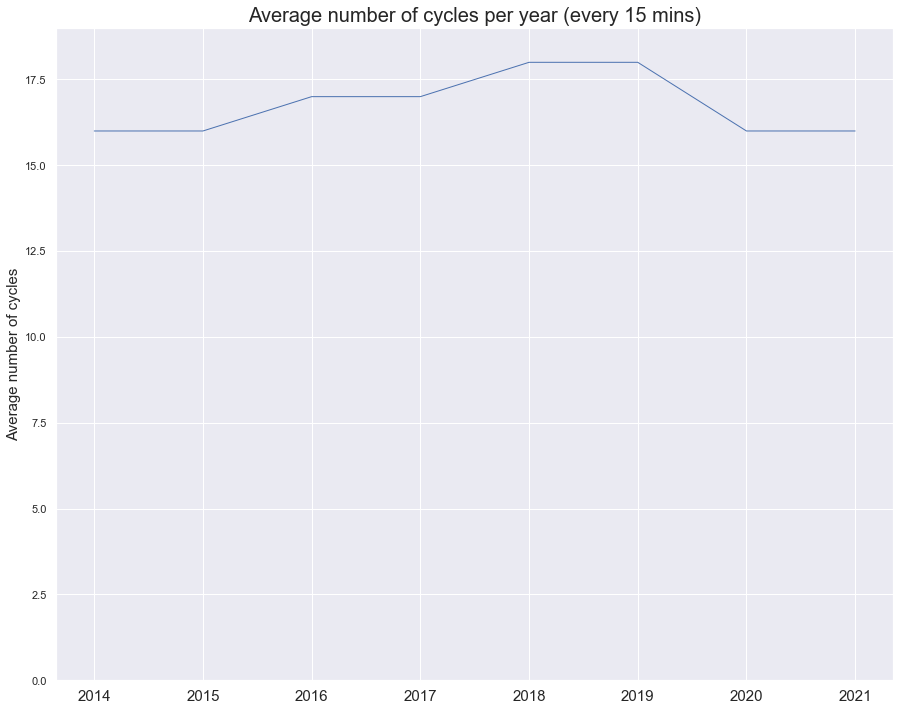

In [263]:
# Plot annualy average numbers of cycles.
# Create a lineplot.
lineplot_y = sns.lineplot(x='Survey_wave_year', y='Total_cycles', 
                           data=year_15mns, 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_y.set_title('Average number of cycles per year (every 15 mins)', 
                      fontdict={'fontsize':20})
lineplot_y.set_xlabel('')
lineplot_y.set_ylabel('Average number of cycles', fontdict={'fontsize':15})
plt.ylim(0, 19)
plt.xticks(fontsize = 15)

# View plot.
plt.show()

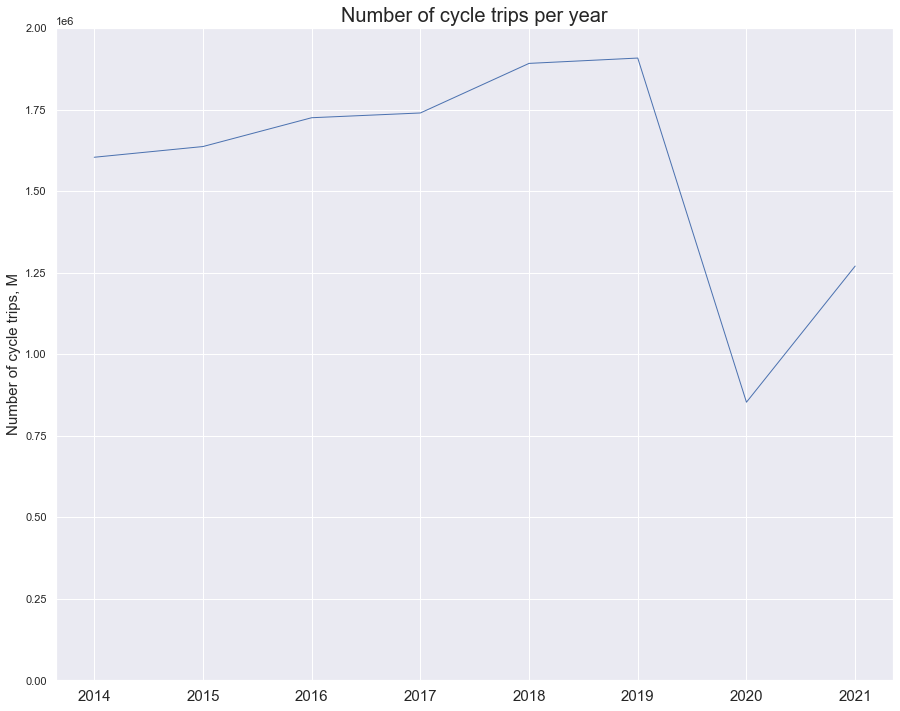

In [264]:
# Plot total numbers of cycle trips by year.
# Create a lineplot.
lineplot_y = sns.lineplot(x='Survey_wave_year', y='Total_cycles', 
                           data=year_ttl, 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_y.set_title('Number of cycle trips per year', 
                      fontdict={'fontsize':20})
lineplot_y.set_xlabel('')
lineplot_y.set_ylabel('Number of cycle trips, M', fontdict={'fontsize':15})
plt.ylim(0, 2000000)
plt.xticks(fontsize = 15)

# View plot.
plt.show()

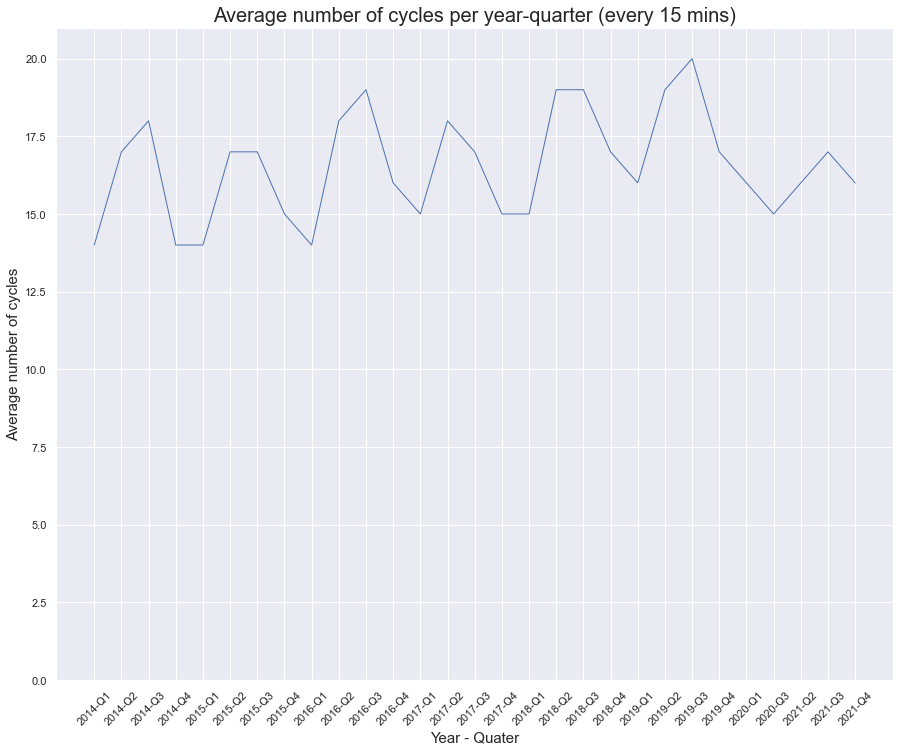

In [265]:
# Plot annualy (incl quarters) average numbers of cycles.
# Create a lineplot.
lineplot_yq = sns.lineplot(x='Year-Quarter', y='Total_cycles', 
                           data=year_Q_15mns.sort_values('Year-Quarter', ascending=1), 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_yq.set_title('Average number of cycles per year-quarter (every 15 mins)', 
                      fontdict={'fontsize':20})
lineplot_yq.set_xlabel('Year - Quater', fontdict={'fontsize':15})
lineplot_yq.set_ylabel('Average number of cycles', fontdict={'fontsize':15})
plt.xticks(rotation=45)
plt.ylim(0, 21)

# View plot.
plt.show()

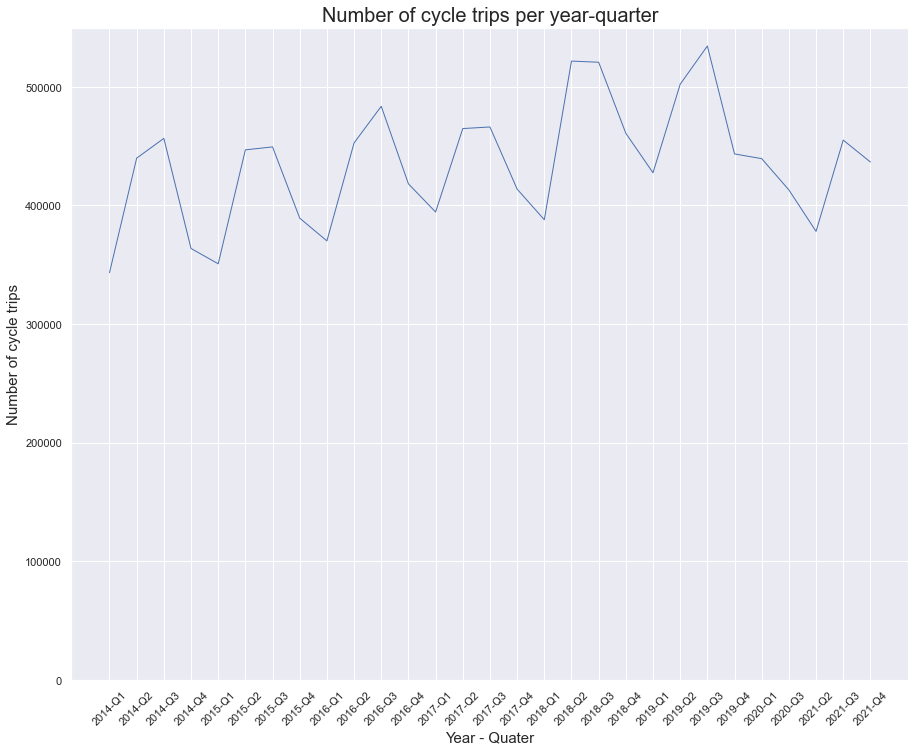

In [266]:
# Plot total number of cycle trips by year-quarter.
# Create a lineplot.
lineplot_yq = sns.lineplot(x='Year-Quarter', y='Total_cycles', 
                           data=year_Q_ttl.sort_values('Year-Quarter', ascending=1), 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_yq.set_title('Number of cycle trips per year-quarter', 
                      fontdict={'fontsize':20})
lineplot_yq.set_xlabel('Year - Quater', fontdict={'fontsize':15})
lineplot_yq.set_ylabel('Number of cycle trips', fontdict={'fontsize':15})
plt.xticks(rotation=45)
plt.ylim(0, 550000)

# View plot.
plt.show()

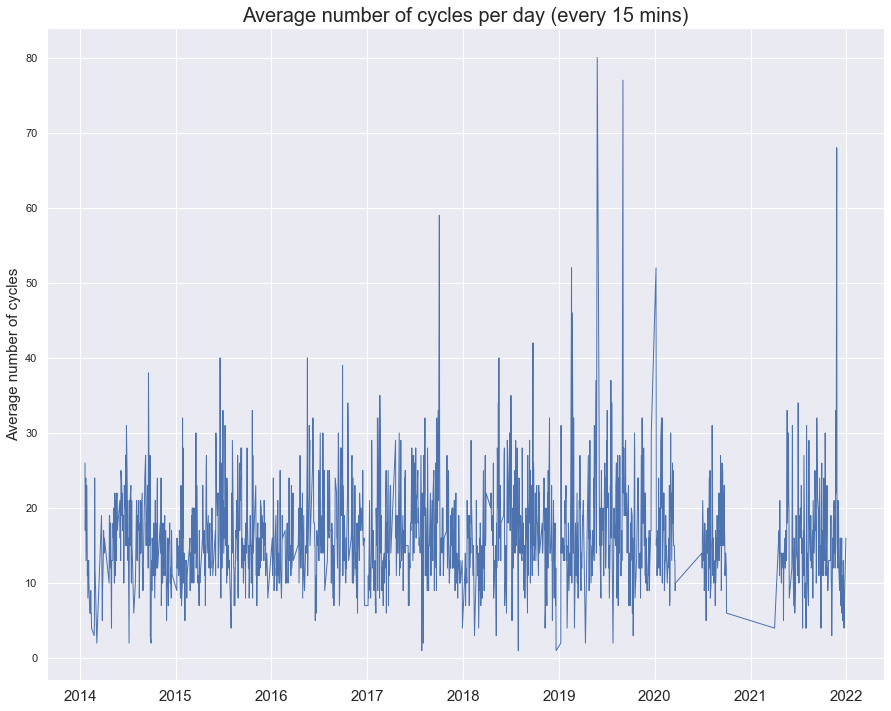

In [267]:
# Plot daily average numbers of cycles.
# Create a lineplot.
lineplot_d = sns.lineplot(x='Date', y='Total_cycles', 
                           data=date_15mns, 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_d.set_title('Average number of cycles per day (every 15 mins)', 
                      fontdict={'fontsize':20})
lineplot_d.set_xlabel('', fontdict={'fontsize':15})
lineplot_d.set_ylabel('Average number of cycles', fontdict={'fontsize':15})
plt.xticks(fontsize = 15)

# View plot.
plt.show()

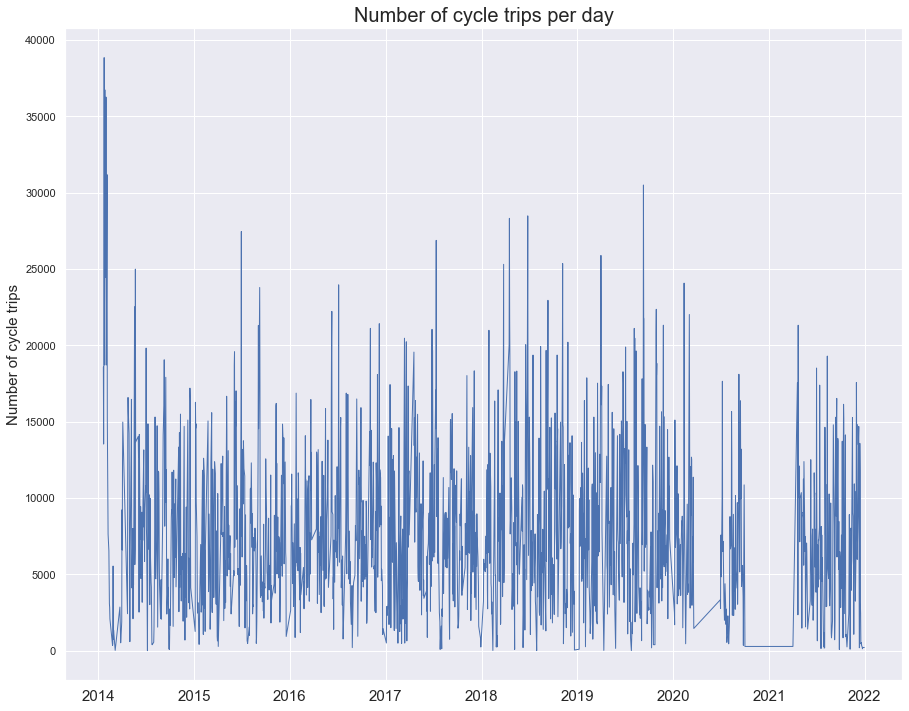

In [268]:
# Plot daily total numbers of cycle trips.
# Create a lineplot.
lineplot_d = sns.lineplot(x='Date', y='Total_cycles', 
                           data=date_ttl, 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_d.set_title('Number of cycle trips per day', 
                      fontdict={'fontsize':20})
lineplot_d.set_xlabel('')
lineplot_d.set_ylabel('Number of cycle trips', fontdict={'fontsize':15})
plt.xticks(fontsize = 15)

# View plot.
plt.show()

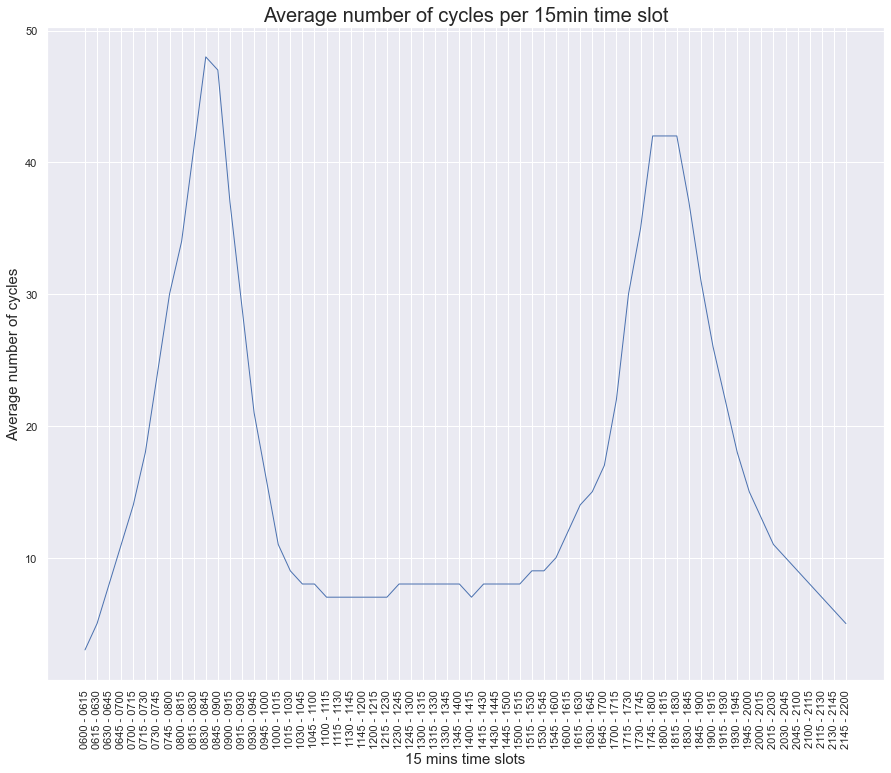

In [269]:
# Plot daily average numbers of cycles per 15 min time slot.
# Create a lineplot.
lineplot_t = sns.lineplot(x='Time', y='Total_cycles', 
                           data=time_15mns.sort_values('Time', ascending=1), 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_t.set_title('Average number of cycles per 15min time slot', 
                      fontdict={'fontsize':20})
lineplot_t.set_xlabel('15 mins time slots', fontdict={'fontsize':15})
lineplot_t.set_ylabel('Average number of cycles', fontdict={'fontsize':15})
plt.xticks(rotation=90)

# View plot.
plt.show()

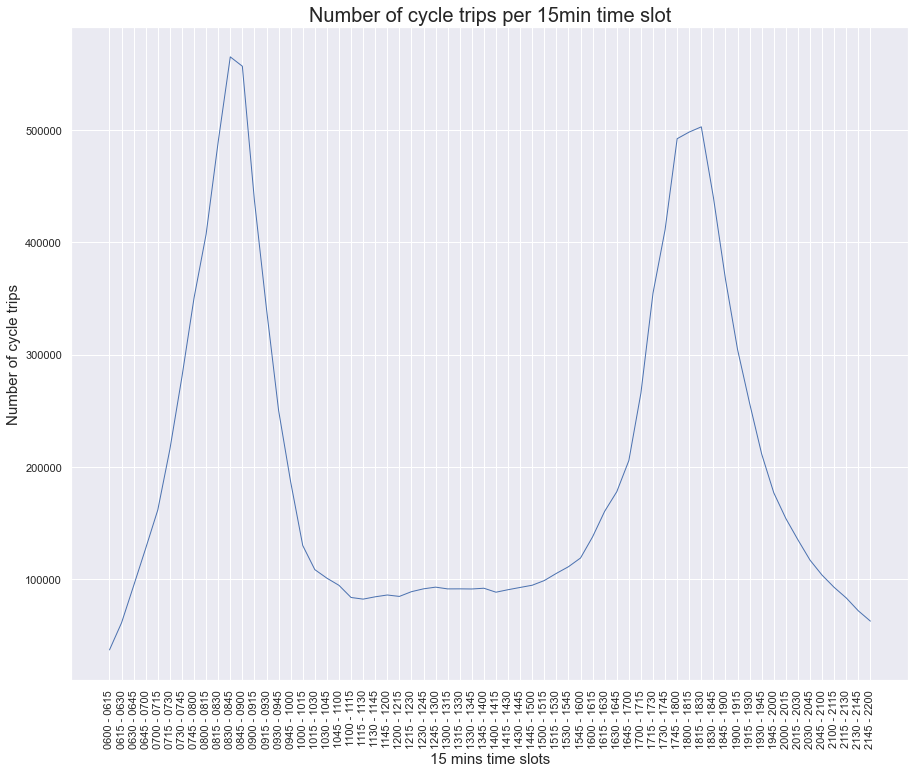

In [270]:
# Plot daily total number of cycle trips per 15 min time slot.
# Create a lineplot.
lineplot_t = sns.lineplot(x='Time', y='Total_cycles', 
                           data=time_ttl.sort_values('Time', ascending=1), 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_t.set_title('Number of cycle trips per 15min time slot', 
                      fontdict={'fontsize':20})
lineplot_t.set_xlabel('15 mins time slots', fontdict={'fontsize':15})
lineplot_t.set_ylabel('Number of cycle trips', fontdict={'fontsize':15})
plt.xticks(rotation=90)

# View plot.
plt.show()

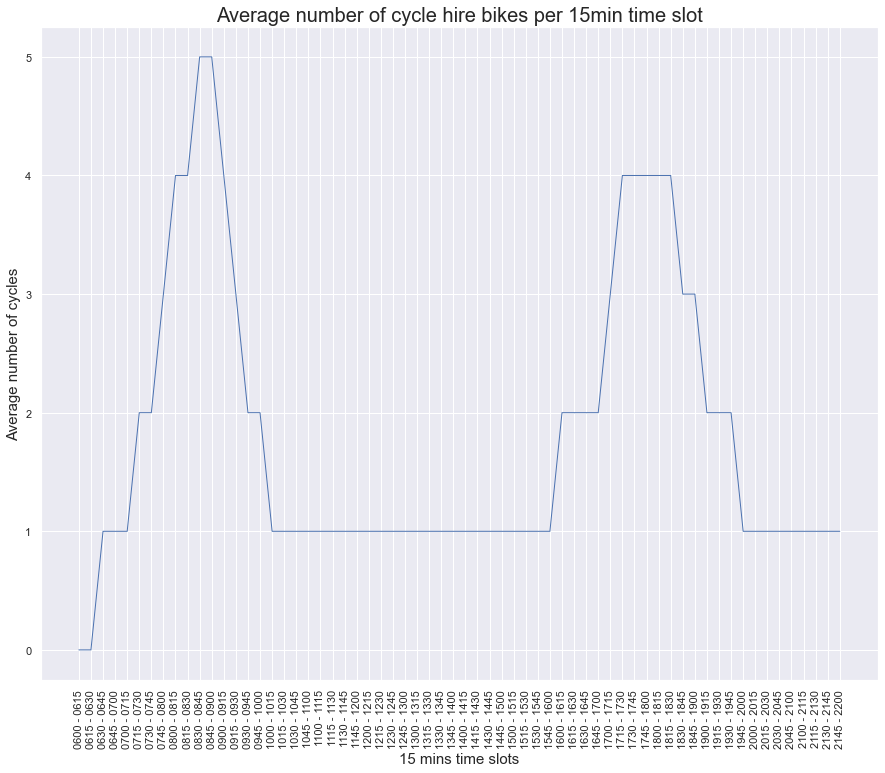

In [271]:
# Plot daily average numbers of cycle hire bikes per 15 min time slot.
# Create a lineplot.
lineplot_t = sns.lineplot(x='Time', y='Number of cycle hire bikes', 
                           data=time_hb_15mns.sort_values('Time', ascending=1), 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_t.set_title('Average number of cycle hire bikes per 15min time slot', 
                      fontdict={'fontsize':20})
lineplot_t.set_xlabel('15 mins time slots', fontdict={'fontsize':15})
lineplot_t.set_ylabel('Average number of cycles', fontdict={'fontsize':15})
plt.xticks(rotation=90)

# View plot.
plt.show()

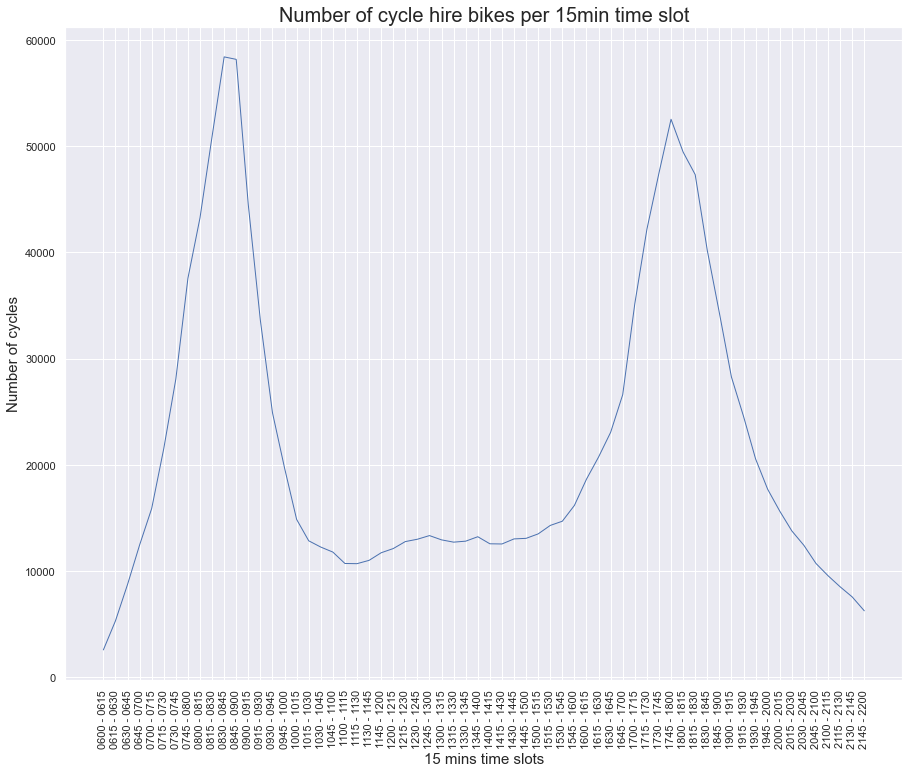

In [272]:
# Plot daily number of cycle hire bikes per 15 min time slot.
# Create a lineplot.
lineplot_t = sns.lineplot(x='Time', y='Number of cycle hire bikes', 
                           data=time_hb_ttl.sort_values('Time', ascending=1), 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_t.set_title('Number of cycle hire bikes per 15min time slot', 
                      fontdict={'fontsize':20})
lineplot_t.set_xlabel('15 mins time slots', fontdict={'fontsize':15})
lineplot_t.set_ylabel('Number of cycles', fontdict={'fontsize':15})
plt.xticks(rotation=90)

# View plot.
plt.show()

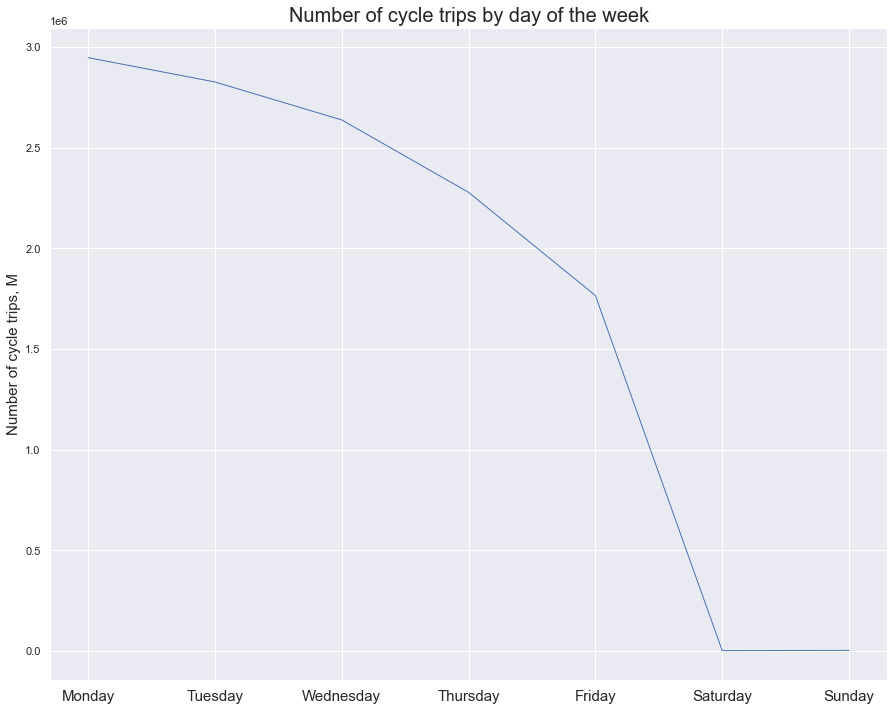

In [273]:
# Number of cycle trips by day of the week.
# Create a lineplot.
lineplot_t = sns.lineplot(x='Day', y='Total_cycles', 
                           data=time_wd_ttl, 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_t.set_title('Number of cycle trips by day of the week', 
                      fontdict={'fontsize':20})
lineplot_t.set_ylabel('Number of cycle trips, M', fontdict={'fontsize':15})
lineplot_t.set_xlabel('')
plt.xticks(fontsize = 15)

# View plot.
plt.show()

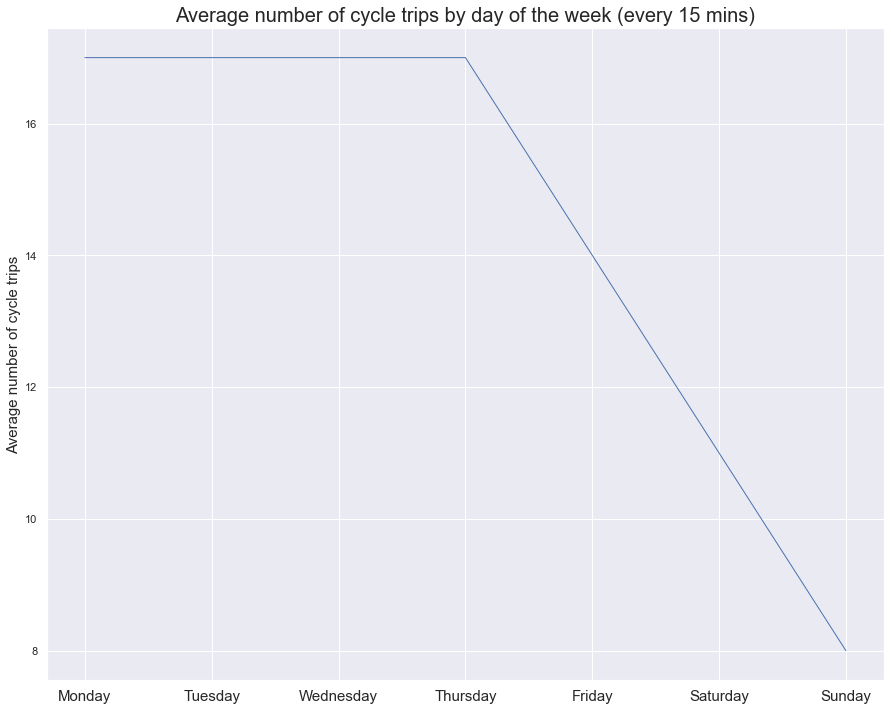

In [274]:
# Average number of cycle trips by day of the week (every 15 mins).
# Create a lineplot.
lineplot_t = sns.lineplot(x='Day', y='Total_cycles', 
                           data=time_wd_15mns, 
                           linewidth=1)

# Update title, x and y labels and legend.
lineplot_t.set_title('Average number of cycle trips by day of the week (every 15 mins)', 
                      fontdict={'fontsize':20})
lineplot_t.set_xlabel('')
lineplot_t.set_ylabel('Average number of cycle trips', fontdict={'fontsize':15})
plt.xticks(fontsize = 15)

# View plot.
plt.show()